In [1]:
from sys import path as syspath
from os import path as ospath
syspath.append(ospath.join(ospath.expanduser("~"), '/data/hashemi/Freetime/Freetime-DQN/Deep-Freetime/SB3_f'))

In [2]:
import torch as torch
torch._C._cuda_getDeviceCount() > 0

True

In [17]:
import os
import gym 
import matplotlib.pyplot as plt
import numpy as np 
from SB3_f.sb3f import DQN
from SB3_f.sb3f.common.vec_env import DummyVecEnv
from SB3_f.sb3f.common.evaluation import evaluate_policy
from SB3_f.sb3f.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold


In [18]:
rewards = [[1,10,5]]
from GridEnv import WindyGridworld
env = WindyGridworld(
        height=20,
        width=11,
        rewards=rewards,
        wind=False,
        allowed_actions=['L', 'R', 'U', 'D'],
        reward_terminates_episode=True
    )

In [19]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to tar

Episode:1 Score:0
Episode:2 Score:0
Episode:3 Score:0
Episode:4 Score:0
Episode:5 Score:0


In [20]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs Bias Only', 'Env 4')

In [21]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=2, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [22]:

model = DQN('CnnPolicy', env, exploration_fraction=0.3,
    exploration_final_eps=0.1,
    learning_starts=100000, verbose = 1,
    buffer_size = 50000,target_update_interval=1000,
    tensorboard_log=log_path)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


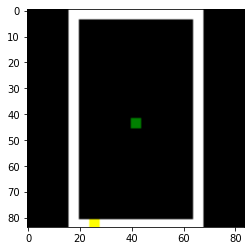

In [23]:
from SB3_f.sb3f.common.utils import obs_as_tensor
device = torch.device('cuda:0')

obs = env.canvas
plt.imshow(obs)


# Check the Network Q Value
observation = np.transpose(obs, (2, 0, 1))
observation = observation[np.newaxis, ...]
observation = obs_as_tensor(observation, device)
with torch.no_grad():
        q_values = model.q_net(observation)

In [24]:
q_values


tensor([[0.9994, 0.9960, 1.0076, 1.0030]], device='cuda:0')

In [25]:
model.learn(total_timesteps=700000, tb_log_name='Env4_Opt_700k')

Logging to Training/Logs Bias Only/Env 4/Env4_Opt_700k_8
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3        |
|    ep_rew_mean      | 0        |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1875     |
|    time_elapsed     | 0        |
|    total_timesteps  | 12       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.5      |
|    ep_rew_mean      | 0        |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1976     |
|    time_elapsed     | 0        |
|    total_timesteps  | 20       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.42     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 1        

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.85     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 3104     |
|    time_elapsed     | 0        |
|    total_timesteps  | 722      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.95     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 96       |
|    fps              | 3110     |
|    time_elapsed     | 0        |
|    total_timesteps  | 763      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.85     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 3284     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2064     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 184      |
|    fps              | 3278     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2071     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes         | 268      |
|    fps              | 3315     |
|    time_elapsed     | 0        |
|    total_timesteps  | 3166     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes         | 272      |
|    fps              | 3310     |
|    time_elapsed     | 0        |
|    total_timesteps  | 3174     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.31     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.983    |
| time/               |          |
|    episodes         | 356      |
|    fps              | 3306     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4000     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.71     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.983    |
| time/               |          |
|    episodes         | 360      |
|    fps              | 3309     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4071     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.57     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.977    |
| time/               |          |
|    episodes         | 444      |
|    fps              | 3343     |
|    time_elapsed     | 1        |
|    total_timesteps  | 5310     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.977    |
| time/               |          |
|    episodes         | 448      |
|    fps              | 3341     |
|    time_elapsed     | 1        |
|    total_timesteps  | 5318     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.977    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 532      |
|    fps              | 3365     |
|    time_elapsed     | 1        |
|    total_timesteps  | 6633     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes         | 536      |
|    fps              | 3367     |
|    time_elapsed     | 1        |
|    total_timesteps  | 6706     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 620      |
|    fps              | 3356     |
|    time_elapsed     | 2        |
|    total_timesteps  | 7493     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.41     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 624      |
|    fps              | 3354     |
|    time_elapsed     | 2        |
|    total_timesteps  | 7506     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.4      |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.15     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes         | 708      |
|    fps              | 3348     |
|    time_elapsed     | 2        |
|    total_timesteps  | 8355     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.14     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes         | 712      |
|    fps              | 3348     |
|    time_elapsed     | 2        |
|    total_timesteps  | 8391     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.24     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.96     |
| time/               |          |
|    episodes         | 796      |
|    fps              | 3345     |
|    time_elapsed     | 2        |
|    total_timesteps  | 9377     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.96     |
| time/               |          |
|    episodes         | 800      |
|    fps              | 3345     |
|    time_elapsed     | 2        |
|    total_timesteps  | 9413     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.959    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.14     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.957    |
| time/               |          |
|    episodes         | 884      |
|    fps              | 3335     |
|    time_elapsed     | 3        |
|    total_timesteps  | 10107    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.24     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.957    |
| time/               |          |
|    episodes         | 888      |
|    fps              | 3334     |
|    time_elapsed     | 3        |
|    total_timesteps  | 10130    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.71     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.957    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.23     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.954    |
| time/               |          |
|    episodes         | 972      |
|    fps              | 3323     |
|    time_elapsed     | 3        |
|    total_timesteps  | 10732    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.07     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.954    |
| time/               |          |
|    episodes         | 976      |
|    fps              | 3322     |
|    time_elapsed     | 3        |
|    total_timesteps  | 10754    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.08     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.953    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.949    |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 3328     |
|    time_elapsed     | 3        |
|    total_timesteps  | 11824    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.949    |
| time/               |          |
|    episodes         | 1064     |
|    fps              | 3328     |
|    time_elapsed     | 3        |
|    total_timesteps  | 11855    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.949    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.946    |
| time/               |          |
|    episodes         | 1148     |
|    fps              | 3323     |
|    time_elapsed     | 3        |
|    total_timesteps  | 12623    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.946    |
| time/               |          |
|    episodes         | 1152     |
|    fps              | 3324     |
|    time_elapsed     | 3        |
|    total_timesteps  | 12682    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.946    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.942    |
| time/               |          |
|    episodes         | 1236     |
|    fps              | 3323     |
|    time_elapsed     | 4        |
|    total_timesteps  | 13584    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes         | 1240     |
|    fps              | 3325     |
|    time_elapsed     | 4        |
|    total_timesteps  | 13707    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.937    |
| time/               |          |
|    episodes         | 1324     |
|    fps              | 3325     |
|    time_elapsed     | 4        |
|    total_timesteps  | 14635    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.937    |
| time/               |          |
|    episodes         | 1328     |
|    fps              | 3325     |
|    time_elapsed     | 4        |
|    total_timesteps  | 14690    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.937    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.62     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes         | 1412     |
|    fps              | 3322     |
|    time_elapsed     | 4        |
|    total_timesteps  | 15542    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.51     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes         | 1416     |
|    fps              | 3322     |
|    time_elapsed     | 4        |
|    total_timesteps  | 15554    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.57     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.48     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.93     |
| time/               |          |
|    episodes         | 1500     |
|    fps              | 3318     |
|    time_elapsed     | 4        |
|    total_timesteps  | 16291    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.31     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.93     |
| time/               |          |
|    episodes         | 1504     |
|    fps              | 3318     |
|    time_elapsed     | 4        |
|    total_timesteps  | 16325    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.42     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.93     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 3326     |
|    time_elapsed     | 5        |
|    total_timesteps  | 17440    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes         | 1592     |
|    fps              | 3325     |
|    time_elapsed     | 5        |
|    total_timesteps  | 17453    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.921    |
| time/               |          |
|    episodes         | 1676     |
|    fps              | 3325     |
|    time_elapsed     | 5        |
|    total_timesteps  | 18455    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.921    |
| time/               |          |
|    episodes         | 1680     |
|    fps              | 3324     |
|    time_elapsed     | 5        |
|    total_timesteps  | 18485    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.92     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes         | 1764     |
|    fps              | 3330     |
|    time_elapsed     | 5        |
|    total_timesteps  | 19711    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.915    |
| time/               |          |
|    episodes         | 1768     |
|    fps              | 3330     |
|    time_elapsed     | 5        |
|    total_timesteps  | 19724    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.915    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.19     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes         | 1852     |
|    fps              | 3326     |
|    time_elapsed     | 6        |
|    total_timesteps  | 20501    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.25     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes         | 1856     |
|    fps              | 3326     |
|    time_elapsed     | 6        |
|    total_timesteps  | 20516    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.66     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.49     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.908    |
| time/               |          |
|    episodes         | 1940     |
|    fps              | 3323     |
|    time_elapsed     | 6        |
|    total_timesteps  | 21359    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.41     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.908    |
| time/               |          |
|    episodes         | 1944     |
|    fps              | 3324     |
|    time_elapsed     | 6        |
|    total_timesteps  | 21415    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.908    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.904    |
| time/               |          |
|    episodes         | 2028     |
|    fps              | 3322     |
|    time_elapsed     | 6        |
|    total_timesteps  | 22286    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.904    |
| time/               |          |
|    episodes         | 2032     |
|    fps              | 3321     |
|    time_elapsed     | 6        |
|    total_timesteps  | 22294    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.904    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.901    |
| time/               |          |
|    episodes         | 2116     |
|    fps              | 3321     |
|    time_elapsed     | 6        |
|    total_timesteps  | 23212    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.9      |
| time/               |          |
|    episodes         | 2120     |
|    fps              | 3320     |
|    time_elapsed     | 6        |
|    total_timesteps  | 23238    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.9      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.897    |
| time/               |          |
|    episodes         | 2204     |
|    fps              | 3318     |
|    time_elapsed     | 7        |
|    total_timesteps  | 24049    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.19     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.897    |
| time/               |          |
|    episodes         | 2208     |
|    fps              | 3318     |
|    time_elapsed     | 7        |
|    total_timesteps  | 24079    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.13     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.897    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.51     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.894    |
| time/               |          |
|    episodes         | 2292     |
|    fps              | 3315     |
|    time_elapsed     | 7        |
|    total_timesteps  | 24818    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.6      |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.893    |
| time/               |          |
|    episodes         | 2296     |
|    fps              | 3315     |
|    time_elapsed     | 7        |
|    total_timesteps  | 24865    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.49     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.893    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.19     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.891    |
| time/               |          |
|    episodes         | 2380     |
|    fps              | 3310     |
|    time_elapsed     | 7        |
|    total_timesteps  | 25490    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.48     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.891    |
| time/               |          |
|    episodes         | 2384     |
|    fps              | 3310     |
|    time_elapsed     | 7        |
|    total_timesteps  | 25533    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.9      |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.89     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.887    |
| time/               |          |
|    episodes         | 2468     |
|    fps              | 3309     |
|    time_elapsed     | 7        |
|    total_timesteps  | 26408    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.887    |
| time/               |          |
|    episodes         | 2472     |
|    fps              | 3309     |
|    time_elapsed     | 7        |
|    total_timesteps  | 26427    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.883    |
| time/               |          |
|    episodes         | 2556     |
|    fps              | 3308     |
|    time_elapsed     | 8        |
|    total_timesteps  | 27271    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.59     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.883    |
| time/               |          |
|    episodes         | 2560     |
|    fps              | 3307     |
|    time_elapsed     | 8        |
|    total_timesteps  | 27281    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.883    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.878    |
| time/               |          |
|    episodes         | 2644     |
|    fps              | 3309     |
|    time_elapsed     | 8        |
|    total_timesteps  | 28373    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.878    |
| time/               |          |
|    episodes         | 2648     |
|    fps              | 3310     |
|    time_elapsed     | 8        |
|    total_timesteps  | 28463    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.878    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.873    |
| time/               |          |
|    episodes         | 2732     |
|    fps              | 3314     |
|    time_elapsed     | 8        |
|    total_timesteps  | 29717    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.873    |
| time/               |          |
|    episodes         | 2736     |
|    fps              | 3313     |
|    time_elapsed     | 8        |
|    total_timesteps  | 29731    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.872    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.49     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.87     |
| time/               |          |
|    episodes         | 2820     |
|    fps              | 3310     |
|    time_elapsed     | 9        |
|    total_timesteps  | 30418    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.26     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.869    |
| time/               |          |
|    episodes         | 2824     |
|    fps              | 3311     |
|    time_elapsed     | 9        |
|    total_timesteps  | 30515    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.29     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.869    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.78     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.867    |
| time/               |          |
|    episodes         | 2908     |
|    fps              | 3306     |
|    time_elapsed     | 9        |
|    total_timesteps  | 31065    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.45     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.866    |
| time/               |          |
|    episodes         | 2912     |
|    fps              | 3306     |
|    time_elapsed     | 9        |
|    total_timesteps  | 31153    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.12     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.866    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.862    |
| time/               |          |
|    episodes         | 2996     |
|    fps              | 3306     |
|    time_elapsed     | 9        |
|    total_timesteps  | 32099    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.862    |
| time/               |          |
|    episodes         | 3000     |
|    fps              | 3306     |
|    time_elapsed     | 9        |
|    total_timesteps  | 32120    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.862    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.9      |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.859    |
| time/               |          |
|    episodes         | 3084     |
|    fps              | 3305     |
|    time_elapsed     | 9        |
|    total_timesteps  | 32967    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.859    |
| time/               |          |
|    episodes         | 3088     |
|    fps              | 3304     |
|    time_elapsed     | 9        |
|    total_timesteps  | 32976    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.16     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.859    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.45     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.856    |
| time/               |          |
|    episodes         | 3172     |
|    fps              | 3301     |
|    time_elapsed     | 10       |
|    total_timesteps  | 33652    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.29     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.856    |
| time/               |          |
|    episodes         | 3176     |
|    fps              | 3301     |
|    time_elapsed     | 10       |
|    total_timesteps  | 33716    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.4      |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.855    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.852    |
| time/               |          |
|    episodes         | 3260     |
|    fps              | 3301     |
|    time_elapsed     | 10       |
|    total_timesteps  | 34577    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.851    |
| time/               |          |
|    episodes         | 3264     |
|    fps              | 3301     |
|    time_elapsed     | 10       |
|    total_timesteps  | 34672    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.851    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.847    |
| time/               |          |
|    episodes         | 3348     |
|    fps              | 3304     |
|    time_elapsed     | 10       |
|    total_timesteps  | 35787    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.847    |
| time/               |          |
|    episodes         | 3352     |
|    fps              | 3304     |
|    time_elapsed     | 10       |
|    total_timesteps  | 35804    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.846    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.843    |
| time/               |          |
|    episodes         | 3436     |
|    fps              | 3303     |
|    time_elapsed     | 11       |
|    total_timesteps  | 36730    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.842    |
| time/               |          |
|    episodes         | 3440     |
|    fps              | 3304     |
|    time_elapsed     | 11       |
|    total_timesteps  | 36789    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.842    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.838    |
| time/               |          |
|    episodes         | 3524     |
|    fps              | 3304     |
|    time_elapsed     | 11       |
|    total_timesteps  | 37690    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.838    |
| time/               |          |
|    episodes         | 3528     |
|    fps              | 3305     |
|    time_elapsed     | 11       |
|    total_timesteps  | 37848    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.837    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.834    |
| time/               |          |
|    episodes         | 3612     |
|    fps              | 3304     |
|    time_elapsed     | 11       |
|    total_timesteps  | 38743    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.834    |
| time/               |          |
|    episodes         | 3616     |
|    fps              | 3304     |
|    time_elapsed     | 11       |
|    total_timesteps  | 38822    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.834    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.11     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.831    |
| time/               |          |
|    episodes         | 3700     |
|    fps              | 3302     |
|    time_elapsed     | 11       |
|    total_timesteps  | 39545    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.25     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.83     |
| time/               |          |
|    episodes         | 3704     |
|    fps              | 3302     |
|    time_elapsed     | 11       |
|    total_timesteps  | 39594    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.44     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.83     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.827    |
| time/               |          |
|    episodes         | 3788     |
|    fps              | 3301     |
|    time_elapsed     | 12       |
|    total_timesteps  | 40466    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.826    |
| time/               |          |
|    episodes         | 3792     |
|    fps              | 3301     |
|    time_elapsed     | 12       |
|    total_timesteps  | 40498    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.826    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.822    |
| time/               |          |
|    episodes         | 3876     |
|    fps              | 3302     |
|    time_elapsed     | 12       |
|    total_timesteps  | 41633    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.821    |
| time/               |          |
|    episodes         | 3880     |
|    fps              | 3303     |
|    time_elapsed     | 12       |
|    total_timesteps  | 41734    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.821    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.77     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.819    |
| time/               |          |
|    episodes         | 3964     |
|    fps              | 3300     |
|    time_elapsed     | 12       |
|    total_timesteps  | 42324    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.818    |
| time/               |          |
|    episodes         | 3968     |
|    fps              | 3300     |
|    time_elapsed     | 12       |
|    total_timesteps  | 42355    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.4      |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.818    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.814    |
| time/               |          |
|    episodes         | 4052     |
|    fps              | 3301     |
|    time_elapsed     | 13       |
|    total_timesteps  | 43435    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.813    |
| time/               |          |
|    episodes         | 4056     |
|    fps              | 3301     |
|    time_elapsed     | 13       |
|    total_timesteps  | 43568    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.813    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.809    |
| time/               |          |
|    episodes         | 4140     |
|    fps              | 3302     |
|    time_elapsed     | 13       |
|    total_timesteps  | 44597    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.809    |
| time/               |          |
|    episodes         | 4144     |
|    fps              | 3302     |
|    time_elapsed     | 13       |
|    total_timesteps  | 44677    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.808    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.805    |
| time/               |          |
|    episodes         | 4228     |
|    fps              | 3302     |
|    time_elapsed     | 13       |
|    total_timesteps  | 45490    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.61     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.805    |
| time/               |          |
|    episodes         | 4232     |
|    fps              | 3302     |
|    time_elapsed     | 13       |
|    total_timesteps  | 45523    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.805    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.801    |
| time/               |          |
|    episodes         | 4316     |
|    fps              | 3301     |
|    time_elapsed     | 14       |
|    total_timesteps  | 46429    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.801    |
| time/               |          |
|    episodes         | 4320     |
|    fps              | 3301     |
|    time_elapsed     | 14       |
|    total_timesteps  | 46454    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.801    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.797    |
| time/               |          |
|    episodes         | 4404     |
|    fps              | 3300     |
|    time_elapsed     | 14       |
|    total_timesteps  | 47336    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.797    |
| time/               |          |
|    episodes         | 4408     |
|    fps              | 3301     |
|    time_elapsed     | 14       |
|    total_timesteps  | 47437    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.797    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.793    |
| time/               |          |
|    episodes         | 4492     |
|    fps              | 3297     |
|    time_elapsed     | 14       |
|    total_timesteps  | 48249    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.77     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.793    |
| time/               |          |
|    episodes         | 4496     |
|    fps              | 3296     |
|    time_elapsed     | 14       |
|    total_timesteps  | 48275    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.56     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.793    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.54     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.789    |
| time/               |          |
|    episodes         | 4580     |
|    fps              | 3295     |
|    time_elapsed     | 14       |
|    total_timesteps  | 49150    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.67     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.789    |
| time/               |          |
|    episodes         | 4584     |
|    fps              | 3294     |
|    time_elapsed     | 14       |
|    total_timesteps  | 49171    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.789    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.55     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.786    |
| time/               |          |
|    episodes         | 4668     |
|    fps              | 3293     |
|    time_elapsed     | 15       |
|    total_timesteps  | 50031    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.84     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.785    |
| time/               |          |
|    episodes         | 4672     |
|    fps              | 3294     |
|    time_elapsed     | 15       |
|    total_timesteps  | 50101    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.785    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.78     |
| time/               |          |
|    episodes         | 4756     |
|    fps              | 3297     |
|    time_elapsed     | 15       |
|    total_timesteps  | 51249    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.78     |
| time/               |          |
|    episodes         | 4760     |
|    fps              | 3297     |
|    time_elapsed     | 15       |
|    total_timesteps  | 51264    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.78     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.777    |
| time/               |          |
|    episodes         | 4844     |
|    fps              | 3297     |
|    time_elapsed     | 15       |
|    total_timesteps  | 52142    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.776    |
| time/               |          |
|    episodes         | 4848     |
|    fps              | 3297     |
|    time_elapsed     | 15       |
|    total_timesteps  | 52158    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.776    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.771    |
| time/               |          |
|    episodes         | 4932     |
|    fps              | 3301     |
|    time_elapsed     | 16       |
|    total_timesteps  | 53415    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.771    |
| time/               |          |
|    episodes         | 4936     |
|    fps              | 3300     |
|    time_elapsed     | 16       |
|    total_timesteps  | 53424    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.771    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.765    |
| time/               |          |
|    episodes         | 5020     |
|    fps              | 3305     |
|    time_elapsed     | 16       |
|    total_timesteps  | 54765    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.765    |
| time/               |          |
|    episodes         | 5024     |
|    fps              | 3304     |
|    time_elapsed     | 16       |
|    total_timesteps  | 54784    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.765    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.759    |
| time/               |          |
|    episodes         | 5108     |
|    fps              | 3309     |
|    time_elapsed     | 16       |
|    total_timesteps  | 56194    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.759    |
| time/               |          |
|    episodes         | 5112     |
|    fps              | 3309     |
|    time_elapsed     | 16       |
|    total_timesteps  | 56219    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.759    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.754    |
| time/               |          |
|    episodes         | 5196     |
|    fps              | 3313     |
|    time_elapsed     | 17       |
|    total_timesteps  | 57310    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.754    |
| time/               |          |
|    episodes         | 5200     |
|    fps              | 3313     |
|    time_elapsed     | 17       |
|    total_timesteps  | 57406    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.754    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.75     |
| time/               |          |
|    episodes         | 5284     |
|    fps              | 3314     |
|    time_elapsed     | 17       |
|    total_timesteps  | 58336    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.75     |
| time/               |          |
|    episodes         | 5288     |
|    fps              | 3314     |
|    time_elapsed     | 17       |
|    total_timesteps  | 58391    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.75     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.1      |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.747    |
| time/               |          |
|    episodes         | 5372     |
|    fps              | 3313     |
|    time_elapsed     | 17       |
|    total_timesteps  | 58955    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.13     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.747    |
| time/               |          |
|    episodes         | 5376     |
|    fps              | 3313     |
|    time_elapsed     | 17       |
|    total_timesteps  | 58986    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.84     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.747    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.24     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.744    |
| time/               |          |
|    episodes         | 5460     |
|    fps              | 3312     |
|    time_elapsed     | 18       |
|    total_timesteps  | 59635    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.38     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.744    |
| time/               |          |
|    episodes         | 5464     |
|    fps              | 3312     |
|    time_elapsed     | 18       |
|    total_timesteps  | 59664    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.29     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.744    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.74     |
| time/               |          |
|    episodes         | 5548     |
|    fps              | 3313     |
|    time_elapsed     | 18       |
|    total_timesteps  | 60643    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.74     |
| time/               |          |
|    episodes         | 5552     |
|    fps              | 3313     |
|    time_elapsed     | 18       |
|    total_timesteps  | 60663    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.74     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.736    |
| time/               |          |
|    episodes         | 5636     |
|    fps              | 3314     |
|    time_elapsed     | 18       |
|    total_timesteps  | 61603    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.736    |
| time/               |          |
|    episodes         | 5640     |
|    fps              | 3314     |
|    time_elapsed     | 18       |
|    total_timesteps  | 61615    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.736    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.52     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.733    |
| time/               |          |
|    episodes         | 5724     |
|    fps              | 3314     |
|    time_elapsed     | 18       |
|    total_timesteps  | 62295    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.96     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.733    |
| time/               |          |
|    episodes         | 5728     |
|    fps              | 3313     |
|    time_elapsed     | 18       |
|    total_timesteps  | 62309    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.8      |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.733    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.52     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.73     |
| time/               |          |
|    episodes         | 5812     |
|    fps              | 3313     |
|    time_elapsed     | 19       |
|    total_timesteps  | 62990    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.48     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.73     |
| time/               |          |
|    episodes         | 5816     |
|    fps              | 3313     |
|    time_elapsed     | 19       |
|    total_timesteps  | 62994    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.58     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.73     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.724    |
| time/               |          |
|    episodes         | 5900     |
|    fps              | 3317     |
|    time_elapsed     | 19       |
|    total_timesteps  | 64372    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.724    |
| time/               |          |
|    episodes         | 5904     |
|    fps              | 3317     |
|    time_elapsed     | 19       |
|    total_timesteps  | 64443    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.724    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.719    |
| time/               |          |
|    episodes         | 5988     |
|    fps              | 3319     |
|    time_elapsed     | 19       |
|    total_timesteps  | 65542    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.719    |
| time/               |          |
|    episodes         | 5992     |
|    fps              | 3319     |
|    time_elapsed     | 19       |
|    total_timesteps  | 65561    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.719    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.715    |
| time/               |          |
|    episodes         | 6076     |
|    fps              | 3319     |
|    time_elapsed     | 20       |
|    total_timesteps  | 66495    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.715    |
| time/               |          |
|    episodes         | 6080     |
|    fps              | 3319     |
|    time_elapsed     | 20       |
|    total_timesteps  | 66509    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.715    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.69     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.711    |
| time/               |          |
|    episodes         | 6164     |
|    fps              | 3319     |
|    time_elapsed     | 20       |
|    total_timesteps  | 67328    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.98     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.711    |
| time/               |          |
|    episodes         | 6168     |
|    fps              | 3319     |
|    time_elapsed     | 20       |
|    total_timesteps  | 67364    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.711    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.706    |
| time/               |          |
|    episodes         | 6252     |
|    fps              | 3322     |
|    time_elapsed     | 20       |
|    total_timesteps  | 68551    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.706    |
| time/               |          |
|    episodes         | 6256     |
|    fps              | 3322     |
|    time_elapsed     | 20       |
|    total_timesteps  | 68588    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.706    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.702    |
| time/               |          |
|    episodes         | 6340     |
|    fps              | 3323     |
|    time_elapsed     | 20       |
|    total_timesteps  | 69509    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.702    |
| time/               |          |
|    episodes         | 6344     |
|    fps              | 3323     |
|    time_elapsed     | 20       |
|    total_timesteps  | 69516    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.702    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.697    |
| time/               |          |
|    episodes         | 6428     |
|    fps              | 3325     |
|    time_elapsed     | 21       |
|    total_timesteps  | 70673    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.697    |
| time/               |          |
|    episodes         | 6432     |
|    fps              | 3325     |
|    time_elapsed     | 21       |
|    total_timesteps  | 70705    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.696    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.692    |
| time/               |          |
|    episodes         | 6516     |
|    fps              | 3328     |
|    time_elapsed     | 21       |
|    total_timesteps  | 71861    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.692    |
| time/               |          |
|    episodes         | 6520     |
|    fps              | 3328     |
|    time_elapsed     | 21       |
|    total_timesteps  | 71942    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.691    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.688    |
| time/               |          |
|    episodes         | 6604     |
|    fps              | 3329     |
|    time_elapsed     | 21       |
|    total_timesteps  | 72855    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.688    |
| time/               |          |
|    episodes         | 6608     |
|    fps              | 3329     |
|    time_elapsed     | 21       |
|    total_timesteps  | 72861    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.687    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.684    |
| time/               |          |
|    episodes         | 6692     |
|    fps              | 3328     |
|    time_elapsed     | 22       |
|    total_timesteps  | 73661    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.42     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.684    |
| time/               |          |
|    episodes         | 6696     |
|    fps              | 3329     |
|    time_elapsed     | 22       |
|    total_timesteps  | 73711    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.684    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.68     |
| time/               |          |
|    episodes         | 6780     |
|    fps              | 3330     |
|    time_elapsed     | 22       |
|    total_timesteps  | 74667    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.68     |
| time/               |          |
|    episodes         | 6784     |
|    fps              | 3330     |
|    time_elapsed     | 22       |
|    total_timesteps  | 74674    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.68     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.675    |
| time/               |          |
|    episodes         | 6868     |
|    fps              | 3332     |
|    time_elapsed     | 22       |
|    total_timesteps  | 75857    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.675    |
| time/               |          |
|    episodes         | 6872     |
|    fps              | 3332     |
|    time_elapsed     | 22       |
|    total_timesteps  | 75908    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.675    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.67     |
| time/               |          |
|    episodes         | 6956     |
|    fps              | 3334     |
|    time_elapsed     | 23       |
|    total_timesteps  | 76984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.67     |
| time/               |          |
|    episodes         | 6960     |
|    fps              | 3334     |
|    time_elapsed     | 23       |
|    total_timesteps  | 76999    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.67     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.664    |
| time/               |          |
|    episodes         | 7044     |
|    fps              | 3338     |
|    time_elapsed     | 23       |
|    total_timesteps  | 78331    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.664    |
| time/               |          |
|    episodes         | 7048     |
|    fps              | 3338     |
|    time_elapsed     | 23       |
|    total_timesteps  | 78424    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.664    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes         | 7132     |
|    fps              | 3339     |
|    time_elapsed     | 23       |
|    total_timesteps  | 79350    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes         | 7136     |
|    fps              | 3339     |
|    time_elapsed     | 23       |
|    total_timesteps  | 79442    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.659    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.656    |
| time/               |          |
|    episodes         | 7220     |
|    fps              | 3340     |
|    time_elapsed     | 24       |
|    total_timesteps  | 80306    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.656    |
| time/               |          |
|    episodes         | 7224     |
|    fps              | 3340     |
|    time_elapsed     | 24       |
|    total_timesteps  | 80335    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.656    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.65     |
| time/               |          |
|    episodes         | 7308     |
|    fps              | 3344     |
|    time_elapsed     | 24       |
|    total_timesteps  | 81754    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.65     |
| time/               |          |
|    episodes         | 7312     |
|    fps              | 3344     |
|    time_elapsed     | 24       |
|    total_timesteps  | 81761    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.649    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.645    |
| time/               |          |
|    episodes         | 7396     |
|    fps              | 3345     |
|    time_elapsed     | 24       |
|    total_timesteps  | 82783    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.645    |
| time/               |          |
|    episodes         | 7400     |
|    fps              | 3345     |
|    time_elapsed     | 24       |
|    total_timesteps  | 82805    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.645    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.64     |
| time/               |          |
|    episodes         | 7484     |
|    fps              | 3346     |
|    time_elapsed     | 25       |
|    total_timesteps  | 83988    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.64     |
| time/               |          |
|    episodes         | 7488     |
|    fps              | 3347     |
|    time_elapsed     | 25       |
|    total_timesteps  | 84054    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.64     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.07     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.637    |
| time/               |          |
|    episodes         | 7572     |
|    fps              | 3345     |
|    time_elapsed     | 25       |
|    total_timesteps  | 84642    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.14     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.637    |
| time/               |          |
|    episodes         | 7576     |
|    fps              | 3345     |
|    time_elapsed     | 25       |
|    total_timesteps  | 84664    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.98     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.637    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.03     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.634    |
| time/               |          |
|    episodes         | 7660     |
|    fps              | 3344     |
|    time_elapsed     | 25       |
|    total_timesteps  | 85360    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.23     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.634    |
| time/               |          |
|    episodes         | 7664     |
|    fps              | 3344     |
|    time_elapsed     | 25       |
|    total_timesteps  | 85397    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.57     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.634    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.63     |
| time/               |          |
|    episodes         | 7748     |
|    fps              | 3346     |
|    time_elapsed     | 25       |
|    total_timesteps  | 86446    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.629    |
| time/               |          |
|    episodes         | 7752     |
|    fps              | 3345     |
|    time_elapsed     | 25       |
|    total_timesteps  | 86453    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.629    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.625    |
| time/               |          |
|    episodes         | 7836     |
|    fps              | 3346     |
|    time_elapsed     | 26       |
|    total_timesteps  | 87420    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.625    |
| time/               |          |
|    episodes         | 7840     |
|    fps              | 3346     |
|    time_elapsed     | 26       |
|    total_timesteps  | 87458    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.625    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 7924     |
|    fps              | 3348     |
|    time_elapsed     | 26       |
|    total_timesteps  | 88584    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 7928     |
|    fps              | 3348     |
|    time_elapsed     | 26       |
|    total_timesteps  | 88622    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.616    |
| time/               |          |
|    episodes         | 8012     |
|    fps              | 3349     |
|    time_elapsed     | 26       |
|    total_timesteps  | 89653    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.616    |
| time/               |          |
|    episodes         | 8016     |
|    fps              | 3349     |
|    time_elapsed     | 26       |
|    total_timesteps  | 89700    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.615    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.611    |
| time/               |          |
|    episodes         | 8100     |
|    fps              | 3350     |
|    time_elapsed     | 27       |
|    total_timesteps  | 90682    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.611    |
| time/               |          |
|    episodes         | 8104     |
|    fps              | 3350     |
|    time_elapsed     | 27       |
|    total_timesteps  | 90742    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.611    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.607    |
| time/               |          |
|    episodes         | 8188     |
|    fps              | 3351     |
|    time_elapsed     | 27       |
|    total_timesteps  | 91660    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.607    |
| time/               |          |
|    episodes         | 8192     |
|    fps              | 3351     |
|    time_elapsed     | 27       |
|    total_timesteps  | 91668    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.607    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.603    |
| time/               |          |
|    episodes         | 8276     |
|    fps              | 3352     |
|    time_elapsed     | 27       |
|    total_timesteps  | 92727    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.602    |
| time/               |          |
|    episodes         | 8280     |
|    fps              | 3352     |
|    time_elapsed     | 27       |
|    total_timesteps  | 92780    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.602    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.89     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.599    |
| time/               |          |
|    episodes         | 8364     |
|    fps              | 3352     |
|    time_elapsed     | 27       |
|    total_timesteps  | 93678    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.598    |
| time/               |          |
|    episodes         | 8368     |
|    fps              | 3352     |
|    time_elapsed     | 27       |
|    total_timesteps  | 93700    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.598    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.593    |
| time/               |          |
|    episodes         | 8452     |
|    fps              | 3355     |
|    time_elapsed     | 28       |
|    total_timesteps  | 95030    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.593    |
| time/               |          |
|    episodes         | 8456     |
|    fps              | 3355     |
|    time_elapsed     | 28       |
|    total_timesteps  | 95064    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.592    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.589    |
| time/               |          |
|    episodes         | 8540     |
|    fps              | 3355     |
|    time_elapsed     | 28       |
|    total_timesteps  | 95990    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.589    |
| time/               |          |
|    episodes         | 8544     |
|    fps              | 3355     |
|    time_elapsed     | 28       |
|    total_timesteps  | 96008    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.588    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.584    |
| time/               |          |
|    episodes         | 8628     |
|    fps              | 3356     |
|    time_elapsed     | 28       |
|    total_timesteps  | 97181    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.582    |
| time/               |          |
|    episodes         | 8632     |
|    fps              | 3357     |
|    time_elapsed     | 29       |
|    total_timesteps  | 97417    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.582    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.579    |
| time/               |          |
|    episodes         | 8716     |
|    fps              | 3358     |
|    time_elapsed     | 29       |
|    total_timesteps  | 98329    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.578    |
| time/               |          |
|    episodes         | 8720     |
|    fps              | 3358     |
|    time_elapsed     | 29       |
|    total_timesteps  | 98379    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.578    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.52     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.575    |
| time/               |          |
|    episodes         | 8804     |
|    fps              | 3358     |
|    time_elapsed     | 29       |
|    total_timesteps  | 99147    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.54     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.575    |
| time/               |          |
|    episodes         | 8808     |
|    fps              | 3357     |
|    time_elapsed     | 29       |
|    total_timesteps  | 99154    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.65     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.575    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.57     |
| time/               |          |
|    episodes         | 8888     |
|    fps              | 3323     |
|    time_elapsed     | 30       |
|    total_timesteps  | 100293   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00618  |
|    n_updates        | 73       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.57     |
| time/               |          |
|    episodes         | 8892     |
|    fps              | 3313     |
|    time_elapsed     | 30       |
|    total_timesteps  | 100388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0324   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.565    |
| time/               |          |
|    episodes         | 8952     |
|    fps              | 3192     |
|    time_elapsed     | 31       |
|    total_timesteps  | 101514   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0571   |
|    n_updates        | 378      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.565    |
| time/               |          |
|    episodes         | 8956     |
|    fps              | 3185     |
|    time_elapsed     | 31       |
|    total_timesteps  | 101573   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0758   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.559    |
| time/               |          |
|    episodes         | 9016     |
|    fps              | 3057     |
|    time_elapsed     | 33       |
|    total_timesteps  | 102860   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0249   |
|    n_updates        | 714      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.559    |
| time/               |          |
|    episodes         | 9020     |
|    fps              | 3047     |
|    time_elapsed     | 33       |
|    total_timesteps  | 102977   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0335   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.553    |
| time/               |          |
|    episodes         | 9080     |
|    fps              | 2941     |
|    time_elapsed     | 35       |
|    total_timesteps  | 104243   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0418   |
|    n_updates        | 1060     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.553    |
| time/               |          |
|    episodes         | 9084     |
|    fps              | 2930     |
|    time_elapsed     | 35       |
|    total_timesteps  | 104360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0305   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.548    |
| time/               |          |
|    episodes         | 9144     |
|    fps              | 2851     |
|    time_elapsed     | 36       |
|    total_timesteps  | 105417   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0213   |
|    n_updates        | 1354     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.548    |
| time/               |          |
|    episodes         | 9148     |
|    fps              | 2847     |
|    time_elapsed     | 37       |
|    total_timesteps  | 105474   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0222   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.543    |
| time/               |          |
|    episodes         | 9208     |
|    fps              | 2760     |
|    time_elapsed     | 38       |
|    total_timesteps  | 106690   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0117   |
|    n_updates        | 1672     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.542    |
| time/               |          |
|    episodes         | 9212     |
|    fps              | 2752     |
|    time_elapsed     | 38       |
|    total_timesteps  | 106805   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0152   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.537    |
| time/               |          |
|    episodes         | 9272     |
|    fps              | 2672     |
|    time_elapsed     | 40       |
|    total_timesteps  | 108034   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0425   |
|    n_updates        | 2008     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.537    |
| time/               |          |
|    episodes         | 9276     |
|    fps              | 2666     |
|    time_elapsed     | 40       |
|    total_timesteps  | 108138   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00764  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.532    |
| time/               |          |
|    episodes         | 9336     |
|    fps              | 2599     |
|    time_elapsed     | 42       |
|    total_timesteps  | 109260   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0232   |
|    n_updates        | 2314     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.531    |
| time/               |          |
|    episodes         | 9340     |
|    fps              | 2594     |
|    time_elapsed     | 42       |
|    total_timesteps  | 109332   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00948  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.525    |
| time/               |          |
|    episodes         | 9400     |
|    fps              | 2511     |
|    time_elapsed     | 44       |
|    total_timesteps  | 110827   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0326   |
|    n_updates        | 2706     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.525    |
| time/               |          |
|    episodes         | 9404     |
|    fps              | 2507     |
|    time_elapsed     | 44       |
|    total_timesteps  | 110899   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0264   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.52     |
| time/               |          |
|    episodes         | 9464     |
|    fps              | 2446     |
|    time_elapsed     | 45       |
|    total_timesteps  | 112049   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0473   |
|    n_updates        | 3012     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.519    |
| time/               |          |
|    episodes         | 9468     |
|    fps              | 2442     |
|    time_elapsed     | 45       |
|    total_timesteps  | 112130   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0244   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.515    |
| time/               |          |
|    episodes         | 9528     |
|    fps              | 2393     |
|    time_elapsed     | 47       |
|    total_timesteps  | 113078   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0238   |
|    n_updates        | 3269     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.515    |
| time/               |          |
|    episodes         | 9532     |
|    fps              | 2386     |
|    time_elapsed     | 47       |
|    total_timesteps  | 113224   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0191   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.51     |
| time/               |          |
|    episodes         | 9592     |
|    fps              | 2336     |
|    time_elapsed     | 48       |
|    total_timesteps  | 114308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0296   |
|    n_updates        | 3576     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.509    |
| time/               |          |
|    episodes         | 9596     |
|    fps              | 2329     |
|    time_elapsed     | 49       |
|    total_timesteps  | 114453   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00734  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.504    |
| time/               |          |
|    episodes         | 9656     |
|    fps              | 2274     |
|    time_elapsed     | 50       |
|    total_timesteps  | 115792   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0192   |
|    n_updates        | 3947     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.503    |
| time/               |          |
|    episodes         | 9660     |
|    fps              | 2270     |
|    time_elapsed     | 51       |
|    total_timesteps  | 115900   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00321  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.499    |
| time/               |          |
|    episodes         | 9720     |
|    fps              | 2229     |
|    time_elapsed     | 52       |
|    total_timesteps  | 116953   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0206   |
|    n_updates        | 4238     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.499    |
| time/               |          |
|    episodes         | 9724     |
|    fps              | 2228     |
|    time_elapsed     | 52       |
|    total_timesteps  | 116990   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0108   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.493    |
| time/               |          |
|    episodes         | 9784     |
|    fps              | 2178     |
|    time_elapsed     | 54       |
|    total_timesteps  | 118348   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0248   |
|    n_updates        | 4586     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.493    |
| time/               |          |
|    episodes         | 9788     |
|    fps              | 2176     |
|    time_elapsed     | 54       |
|    total_timesteps  | 118410   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0258   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.488    |
| time/               |          |
|    episodes         | 9848     |
|    fps              | 2139     |
|    time_elapsed     | 55       |
|    total_timesteps  | 119443   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00883  |
|    n_updates        | 4860     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.8     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.488    |
| time/               |          |
|    episodes         | 9852     |
|    fps              | 2137     |
|    time_elapsed     | 55       |
|    total_timesteps  | 119509   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0228   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.482    |
| time/               |          |
|    episodes         | 9912     |
|    fps              | 2089     |
|    time_elapsed     | 57       |
|    total_timesteps  | 120962   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0143   |
|    n_updates        | 5240     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.482    |
| time/               |          |
|    episodes         | 9916     |
|    fps              | 2088     |
|    time_elapsed     | 57       |
|    total_timesteps  | 120976   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0144   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.478    |
| time/               |          |
|    episodes         | 9976     |
|    fps              | 2062     |
|    time_elapsed     | 59       |
|    total_timesteps  | 121807   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0148   |
|    n_updates        | 5451     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.478    |
| time/               |          |
|    episodes         | 9980     |
|    fps              | 2059     |
|    time_elapsed     | 59       |
|    total_timesteps  | 121896   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0154   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.472    |
| time/               |          |
|    episodes         | 10040    |
|    fps              | 2020     |
|    time_elapsed     | 60       |
|    total_timesteps  | 123213   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00821  |
|    n_updates        | 5803     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.472    |
| time/               |          |
|    episodes         | 10044    |
|    fps              | 2018     |
|    time_elapsed     | 61       |
|    total_timesteps  | 123264   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0125   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.466    |
| time/               |          |
|    episodes         | 10104    |
|    fps              | 1983     |
|    time_elapsed     | 62       |
|    total_timesteps  | 124507   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00596  |
|    n_updates        | 6126     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.466    |
| time/               |          |
|    episodes         | 10108    |
|    fps              | 1979     |
|    time_elapsed     | 62       |
|    total_timesteps  | 124647   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0219   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.463    |
| time/               |          |
|    episodes         | 10168    |
|    fps              | 1958     |
|    time_elapsed     | 64       |
|    total_timesteps  | 125370   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0288   |
|    n_updates        | 6342     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.462    |
| time/               |          |
|    episodes         | 10172    |
|    fps              | 1955     |
|    time_elapsed     | 64       |
|    total_timesteps  | 125501   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0149   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.458    |
| time/               |          |
|    episodes         | 10232    |
|    fps              | 1928     |
|    time_elapsed     | 65       |
|    total_timesteps  | 126517   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0167   |
|    n_updates        | 6629     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.457    |
| time/               |          |
|    episodes         | 10236    |
|    fps              | 1926     |
|    time_elapsed     | 65       |
|    total_timesteps  | 126596   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0176   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.452    |
| time/               |          |
|    episodes         | 10296    |
|    fps              | 1895     |
|    time_elapsed     | 67       |
|    total_timesteps  | 127904   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00909  |
|    n_updates        | 6975     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.9     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.452    |
| time/               |          |
|    episodes         | 10300    |
|    fps              | 1893     |
|    time_elapsed     | 67       |
|    total_timesteps  | 127973   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00888  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.447    |
| time/               |          |
|    episodes         | 10360    |
|    fps              | 1868     |
|    time_elapsed     | 69       |
|    total_timesteps  | 129014   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00904  |
|    n_updates        | 7253     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.447    |
| time/               |          |
|    episodes         | 10364    |
|    fps              | 1866     |
|    time_elapsed     | 69       |
|    total_timesteps  | 129110   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00517  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.442    |
| time/               |          |
|    episodes         | 10424    |
|    fps              | 1842     |
|    time_elapsed     | 70       |
|    total_timesteps  | 130138   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00106  |
|    n_updates        | 7534     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.442    |
| time/               |          |
|    episodes         | 10428    |
|    fps              | 1840     |
|    time_elapsed     | 70       |
|    total_timesteps  | 130231   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.438    |
| time/               |          |
|    episodes         | 10488    |
|    fps              | 1821     |
|    time_elapsed     | 72       |
|    total_timesteps  | 131128   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0127   |
|    n_updates        | 7781     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.438    |
| time/               |          |
|    episodes         | 10492    |
|    fps              | 1820     |
|    time_elapsed     | 72       |
|    total_timesteps  | 131165   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00454  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.434    |
| time/               |          |
|    episodes         | 10552    |
|    fps              | 1801     |
|    time_elapsed     | 73       |
|    total_timesteps  | 132062   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00193  |
|    n_updates        | 8015     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.434    |
| time/               |          |
|    episodes         | 10556    |
|    fps              | 1799     |
|    time_elapsed     | 73       |
|    total_timesteps  | 132151   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00667  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.43     |
| time/               |          |
|    episodes         | 10616    |
|    fps              | 1782     |
|    time_elapsed     | 74       |
|    total_timesteps  | 133019   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00747  |
|    n_updates        | 8254     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.43     |
| time/               |          |
|    episodes         | 10620    |
|    fps              | 1781     |
|    time_elapsed     | 74       |
|    total_timesteps  | 133061   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.013    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.426    |
| time/               |          |
|    episodes         | 10680    |
|    fps              | 1762     |
|    time_elapsed     | 76       |
|    total_timesteps  | 133986   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00997  |
|    n_updates        | 8496     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.425    |
| time/               |          |
|    episodes         | 10684    |
|    fps              | 1760     |
|    time_elapsed     | 76       |
|    total_timesteps  | 134105   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00107  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.42     |
| time/               |          |
|    episodes         | 10744    |
|    fps              | 1739     |
|    time_elapsed     | 77       |
|    total_timesteps  | 135220   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00372  |
|    n_updates        | 8804     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.42     |
| time/               |          |
|    episodes         | 10748    |
|    fps              | 1738     |
|    time_elapsed     | 77       |
|    total_timesteps  | 135285   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00419  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.417    |
| time/               |          |
|    episodes         | 10808    |
|    fps              | 1722     |
|    time_elapsed     | 79       |
|    total_timesteps  | 136110   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00617  |
|    n_updates        | 9027     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.417    |
| time/               |          |
|    episodes         | 10812    |
|    fps              | 1722     |
|    time_elapsed     | 79       |
|    total_timesteps  | 136145   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00305  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.411    |
| time/               |          |
|    episodes         | 10872    |
|    fps              | 1699     |
|    time_elapsed     | 80       |
|    total_timesteps  | 137326   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00535  |
|    n_updates        | 9331     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.411    |
| time/               |          |
|    episodes         | 10876    |
|    fps              | 1698     |
|    time_elapsed     | 80       |
|    total_timesteps  | 137352   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0058   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.408    |
| time/               |          |
|    episodes         | 10936    |
|    fps              | 1685     |
|    time_elapsed     | 81       |
|    total_timesteps  | 138054   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000498 |
|    n_updates        | 9513     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.408    |
| time/               |          |
|    episodes         | 10940    |
|    fps              | 1684     |
|    time_elapsed     | 82       |
|    total_timesteps  | 138149   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00839  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.403    |
| time/               |          |
|    episodes         | 11000    |
|    fps              | 1664     |
|    time_elapsed     | 83       |
|    total_timesteps  | 139358   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00381  |
|    n_updates        | 9839     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.403    |
| time/               |          |
|    episodes         | 11004    |
|    fps              | 1663     |
|    time_elapsed     | 83       |
|    total_timesteps  | 139383   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00525  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.4      |
| time/               |          |
|    episodes         | 11064    |
|    fps              | 1654     |
|    time_elapsed     | 84       |
|    total_timesteps  | 139964   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00616  |
|    n_updates        | 9990     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.4      |
| time/               |          |
|    episodes         | 11068    |
|    fps              | 1653     |
|    time_elapsed     | 84       |
|    total_timesteps  | 140053   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00314  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.396    |
| time/               |          |
|    episodes         | 11128    |
|    fps              | 1637     |
|    time_elapsed     | 86       |
|    total_timesteps  | 141043   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00266  |
|    n_updates        | 10260    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.395    |
| time/               |          |
|    episodes         | 11132    |
|    fps              | 1636     |
|    time_elapsed     | 86       |
|    total_timesteps  | 141088   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0046   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.391    |
| time/               |          |
|    episodes         | 11192    |
|    fps              | 1621     |
|    time_elapsed     | 87       |
|    total_timesteps  | 142117   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00684  |
|    n_updates        | 10529    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.391    |
| time/               |          |
|    episodes         | 11196    |
|    fps              | 1620     |
|    time_elapsed     | 87       |
|    total_timesteps  | 142180   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000372 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.386    |
| time/               |          |
|    episodes         | 11256    |
|    fps              | 1605     |
|    time_elapsed     | 89       |
|    total_timesteps  | 143272   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00014  |
|    n_updates        | 10817    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.386    |
| time/               |          |
|    episodes         | 11260    |
|    fps              | 1604     |
|    time_elapsed     | 89       |
|    total_timesteps  | 143281   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00244  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.381    |
| time/               |          |
|    episodes         | 11320    |
|    fps              | 1588     |
|    time_elapsed     | 90       |
|    total_timesteps  | 144414   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00232  |
|    n_updates        | 11103    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.381    |
| time/               |          |
|    episodes         | 11324    |
|    fps              | 1587     |
|    time_elapsed     | 91       |
|    total_timesteps  | 144479   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00192  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.377    |
| time/               |          |
|    episodes         | 11384    |
|    fps              | 1573     |
|    time_elapsed     | 92       |
|    total_timesteps  | 145457   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00208  |
|    n_updates        | 11364    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.377    |
| time/               |          |
|    episodes         | 11388    |
|    fps              | 1573     |
|    time_elapsed     | 92       |
|    total_timesteps  | 145482   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00371  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.373    |
| time/               |          |
|    episodes         | 11448    |
|    fps              | 1561     |
|    time_elapsed     | 93       |
|    total_timesteps  | 146252   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00172  |
|    n_updates        | 11562    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.373    |
| time/               |          |
|    episodes         | 11452    |
|    fps              | 1560     |
|    time_elapsed     | 93       |
|    total_timesteps  | 146314   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00354  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.369    |
| time/               |          |
|    episodes         | 11512    |
|    fps              | 1549     |
|    time_elapsed     | 94       |
|    total_timesteps  | 147132   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00292  |
|    n_updates        | 11782    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.369    |
| time/               |          |
|    episodes         | 11516    |
|    fps              | 1549     |
|    time_elapsed     | 94       |
|    total_timesteps  | 147144   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00163  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.364    |
| time/               |          |
|    episodes         | 11576    |
|    fps              | 1534     |
|    time_elapsed     | 96       |
|    total_timesteps  | 148297   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00439  |
|    n_updates        | 12074    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.364    |
| time/               |          |
|    episodes         | 11580    |
|    fps              | 1533     |
|    time_elapsed     | 96       |
|    total_timesteps  | 148345   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0016   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.361    |
| time/               |          |
|    episodes         | 11640    |
|    fps              | 1523     |
|    time_elapsed     | 97       |
|    total_timesteps  | 149156   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000112 |
|    n_updates        | 12288    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.361    |
| time/               |          |
|    episodes         | 11644    |
|    fps              | 1523     |
|    time_elapsed     | 97       |
|    total_timesteps  | 149173   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.98e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.357    |
| time/               |          |
|    episodes         | 11704    |
|    fps              | 1513     |
|    time_elapsed     | 99       |
|    total_timesteps  | 149943   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.08e-05 |
|    n_updates        | 12485    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.357    |
| time/               |          |
|    episodes         | 11708    |
|    fps              | 1512     |
|    time_elapsed     | 99       |
|    total_timesteps  | 149987   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00619  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.353    |
| time/               |          |
|    episodes         | 11768    |
|    fps              | 1501     |
|    time_elapsed     | 100      |
|    total_timesteps  | 150887   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0042   |
|    n_updates        | 12721    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.353    |
| time/               |          |
|    episodes         | 11772    |
|    fps              | 1500     |
|    time_elapsed     | 100      |
|    total_timesteps  | 150991   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0108   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.349    |
| time/               |          |
|    episodes         | 11832    |
|    fps              | 1491     |
|    time_elapsed     | 101      |
|    total_timesteps  | 151790   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0108   |
|    n_updates        | 12947    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.349    |
| time/               |          |
|    episodes         | 11836    |
|    fps              | 1490     |
|    time_elapsed     | 101      |
|    total_timesteps  | 151867   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000165 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.346    |
| time/               |          |
|    episodes         | 11896    |
|    fps              | 1481     |
|    time_elapsed     | 103      |
|    total_timesteps  | 152646   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00104  |
|    n_updates        | 13161    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.346    |
| time/               |          |
|    episodes         | 11900    |
|    fps              | 1481     |
|    time_elapsed     | 103      |
|    total_timesteps  | 152678   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00185  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.342    |
| time/               |          |
|    episodes         | 11960    |
|    fps              | 1470     |
|    time_elapsed     | 104      |
|    total_timesteps  | 153581   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00105  |
|    n_updates        | 13395    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.341    |
| time/               |          |
|    episodes         | 11964    |
|    fps              | 1469     |
|    time_elapsed     | 104      |
|    total_timesteps  | 153655   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0101   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.339    |
| time/               |          |
|    episodes         | 12024    |
|    fps              | 1462     |
|    time_elapsed     | 105      |
|    total_timesteps  | 154263   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000221 |
|    n_updates        | 13565    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.339    |
| time/               |          |
|    episodes         | 12028    |
|    fps              | 1461     |
|    time_elapsed     | 105      |
|    total_timesteps  | 154291   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00899  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.335    |
| time/               |          |
|    episodes         | 12088    |
|    fps              | 1452     |
|    time_elapsed     | 106      |
|    total_timesteps  | 155082   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00241  |
|    n_updates        | 13770    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.335    |
| time/               |          |
|    episodes         | 12092    |
|    fps              | 1451     |
|    time_elapsed     | 106      |
|    total_timesteps  | 155172   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00177  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.331    |
| time/               |          |
|    episodes         | 12152    |
|    fps              | 1441     |
|    time_elapsed     | 108      |
|    total_timesteps  | 156206   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000748 |
|    n_updates        | 14051    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.33     |
| time/               |          |
|    episodes         | 12156    |
|    fps              | 1440     |
|    time_elapsed     | 108      |
|    total_timesteps  | 156325   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.4e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.327    |
| time/               |          |
|    episodes         | 12216    |
|    fps              | 1433     |
|    time_elapsed     | 109      |
|    total_timesteps  | 157028   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0028   |
|    n_updates        | 14256    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.327    |
| time/               |          |
|    episodes         | 12220    |
|    fps              | 1432     |
|    time_elapsed     | 109      |
|    total_timesteps  | 157111   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00176  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.323    |
| time/               |          |
|    episodes         | 12280    |
|    fps              | 1423     |
|    time_elapsed     | 110      |
|    total_timesteps  | 157931   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00101  |
|    n_updates        | 14482    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.323    |
| time/               |          |
|    episodes         | 12284    |
|    fps              | 1423     |
|    time_elapsed     | 111      |
|    total_timesteps  | 158007   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00159  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.317    |
| time/               |          |
|    episodes         | 12344    |
|    fps              | 1411     |
|    time_elapsed     | 112      |
|    total_timesteps  | 159253   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00278  |
|    n_updates        | 14813    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.317    |
| time/               |          |
|    episodes         | 12348    |
|    fps              | 1410     |
|    time_elapsed     | 112      |
|    total_timesteps  | 159346   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00276  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.313    |
| time/               |          |
|    episodes         | 12408    |
|    fps              | 1402     |
|    time_elapsed     | 114      |
|    total_timesteps  | 160199   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00154  |
|    n_updates        | 15049    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.313    |
| time/               |          |
|    episodes         | 12412    |
|    fps              | 1401     |
|    time_elapsed     | 114      |
|    total_timesteps  | 160308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0116   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.31     |
| time/               |          |
|    episodes         | 12472    |
|    fps              | 1394     |
|    time_elapsed     | 115      |
|    total_timesteps  | 161024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.77e-05 |
|    n_updates        | 15255    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.31     |
| time/               |          |
|    episodes         | 12476    |
|    fps              | 1393     |
|    time_elapsed     | 115      |
|    total_timesteps  | 161106   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0105   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.306    |
| time/               |          |
|    episodes         | 12536    |
|    fps              | 1385     |
|    time_elapsed     | 116      |
|    total_timesteps  | 162014   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000774 |
|    n_updates        | 15503    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.305    |
| time/               |          |
|    episodes         | 12540    |
|    fps              | 1385     |
|    time_elapsed     | 117      |
|    total_timesteps  | 162072   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00195  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.301    |
| time/               |          |
|    episodes         | 12600    |
|    fps              | 1376     |
|    time_elapsed     | 118      |
|    total_timesteps  | 163069   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.91e-05 |
|    n_updates        | 15767    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.301    |
| time/               |          |
|    episodes         | 12604    |
|    fps              | 1375     |
|    time_elapsed     | 118      |
|    total_timesteps  | 163163   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00241  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.297    |
| time/               |          |
|    episodes         | 12664    |
|    fps              | 1368     |
|    time_elapsed     | 119      |
|    total_timesteps  | 164047   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0119   |
|    n_updates        | 16011    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.296    |
| time/               |          |
|    episodes         | 12668    |
|    fps              | 1367     |
|    time_elapsed     | 120      |
|    total_timesteps  | 164155   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000654 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.293    |
| time/               |          |
|    episodes         | 12728    |
|    fps              | 1360     |
|    time_elapsed     | 121      |
|    total_timesteps  | 164929   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000975 |
|    n_updates        | 16232    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.293    |
| time/               |          |
|    episodes         | 12732    |
|    fps              | 1359     |
|    time_elapsed     | 121      |
|    total_timesteps  | 165004   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00061  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.289    |
| time/               |          |
|    episodes         | 12792    |
|    fps              | 1351     |
|    time_elapsed     | 122      |
|    total_timesteps  | 165927   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.18e-05 |
|    n_updates        | 16481    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.289    |
| time/               |          |
|    episodes         | 12796    |
|    fps              | 1351     |
|    time_elapsed     | 122      |
|    total_timesteps  | 166000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000601 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.286    |
| time/               |          |
|    episodes         | 12856    |
|    fps              | 1344     |
|    time_elapsed     | 123      |
|    total_timesteps  | 166693   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00174  |
|    n_updates        | 16673    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.285    |
| time/               |          |
|    episodes         | 12860    |
|    fps              | 1344     |
|    time_elapsed     | 124      |
|    total_timesteps  | 166772   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00247  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.283    |
| time/               |          |
|    episodes         | 12920    |
|    fps              | 1339     |
|    time_elapsed     | 124      |
|    total_timesteps  | 167385   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00228  |
|    n_updates        | 16846    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.282    |
| time/               |          |
|    episodes         | 12924    |
|    fps              | 1338     |
|    time_elapsed     | 125      |
|    total_timesteps  | 167442   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00134  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.278    |
| time/               |          |
|    episodes         | 12984    |
|    fps              | 1331     |
|    time_elapsed     | 126      |
|    total_timesteps  | 168364   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00258  |
|    n_updates        | 17090    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.278    |
| time/               |          |
|    episodes         | 12988    |
|    fps              | 1331     |
|    time_elapsed     | 126      |
|    total_timesteps  | 168373   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00132  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.274    |
| time/               |          |
|    episodes         | 13048    |
|    fps              | 1324     |
|    time_elapsed     | 127      |
|    total_timesteps  | 169313   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000255 |
|    n_updates        | 17328    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.274    |
| time/               |          |
|    episodes         | 13052    |
|    fps              | 1324     |
|    time_elapsed     | 127      |
|    total_timesteps  | 169366   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00131  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.27     |
| time/               |          |
|    episodes         | 13112    |
|    fps              | 1316     |
|    time_elapsed     | 129      |
|    total_timesteps  | 170364   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0129   |
|    n_updates        | 17590    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.27     |
| time/               |          |
|    episodes         | 13116    |
|    fps              | 1316     |
|    time_elapsed     | 129      |
|    total_timesteps  | 170436   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000714 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.266    |
| time/               |          |
|    episodes         | 13176    |
|    fps              | 1309     |
|    time_elapsed     | 130      |
|    total_timesteps  | 171320   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00175  |
|    n_updates        | 17829    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.266    |
| time/               |          |
|    episodes         | 13180    |
|    fps              | 1309     |
|    time_elapsed     | 130      |
|    total_timesteps  | 171375   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000742 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.262    |
| time/               |          |
|    episodes         | 13240    |
|    fps              | 1303     |
|    time_elapsed     | 132      |
|    total_timesteps  | 172206   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00263  |
|    n_updates        | 18051    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.262    |
| time/               |          |
|    episodes         | 13244    |
|    fps              | 1302     |
|    time_elapsed     | 132      |
|    total_timesteps  | 172290   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00167  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.257    |
| time/               |          |
|    episodes         | 13304    |
|    fps              | 1295     |
|    time_elapsed     | 133      |
|    total_timesteps  | 173315   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0112   |
|    n_updates        | 18328    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.257    |
| time/               |          |
|    episodes         | 13308    |
|    fps              | 1295     |
|    time_elapsed     | 133      |
|    total_timesteps  | 173393   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00143  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.252    |
| time/               |          |
|    episodes         | 13368    |
|    fps              | 1288     |
|    time_elapsed     | 135      |
|    total_timesteps  | 174420   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00266  |
|    n_updates        | 18604    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.252    |
| time/               |          |
|    episodes         | 13372    |
|    fps              | 1287     |
|    time_elapsed     | 135      |
|    total_timesteps  | 174506   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000643 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.248    |
| time/               |          |
|    episodes         | 13432    |
|    fps              | 1280     |
|    time_elapsed     | 137      |
|    total_timesteps  | 175502   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0114   |
|    n_updates        | 18875    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.248    |
| time/               |          |
|    episodes         | 13436    |
|    fps              | 1280     |
|    time_elapsed     | 137      |
|    total_timesteps  | 175572   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0111   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.244    |
| time/               |          |
|    episodes         | 13496    |
|    fps              | 1274     |
|    time_elapsed     | 138      |
|    total_timesteps  | 176447   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00113  |
|    n_updates        | 19111    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.244    |
| time/               |          |
|    episodes         | 13500    |
|    fps              | 1274     |
|    time_elapsed     | 138      |
|    total_timesteps  | 176493   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0112   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.24     |
| time/               |          |
|    episodes         | 13560    |
|    fps              | 1268     |
|    time_elapsed     | 139      |
|    total_timesteps  | 177429   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00247  |
|    n_updates        | 19357    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.239    |
| time/               |          |
|    episodes         | 13564    |
|    fps              | 1267     |
|    time_elapsed     | 140      |
|    total_timesteps  | 177499   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00105  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.235    |
| time/               |          |
|    episodes         | 13624    |
|    fps              | 1261     |
|    time_elapsed     | 141      |
|    total_timesteps  | 178470   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00207  |
|    n_updates        | 19617    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.235    |
| time/               |          |
|    episodes         | 13628    |
|    fps              | 1261     |
|    time_elapsed     | 141      |
|    total_timesteps  | 178489   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00153  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.231    |
| time/               |          |
|    episodes         | 13688    |
|    fps              | 1255     |
|    time_elapsed     | 142      |
|    total_timesteps  | 179409   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000554 |
|    n_updates        | 19852    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.231    |
| time/               |          |
|    episodes         | 13692    |
|    fps              | 1255     |
|    time_elapsed     | 142      |
|    total_timesteps  | 179450   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000514 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.227    |
| time/               |          |
|    episodes         | 13752    |
|    fps              | 1248     |
|    time_elapsed     | 144      |
|    total_timesteps  | 180452   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000535 |
|    n_updates        | 20112    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.226    |
| time/               |          |
|    episodes         | 13756    |
|    fps              | 1248     |
|    time_elapsed     | 144      |
|    total_timesteps  | 180502   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000483 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.222    |
| time/               |          |
|    episodes         | 13816    |
|    fps              | 1241     |
|    time_elapsed     | 146      |
|    total_timesteps  | 181608   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000821 |
|    n_updates        | 20401    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.221    |
| time/               |          |
|    episodes         | 13820    |
|    fps              | 1241     |
|    time_elapsed     | 146      |
|    total_timesteps  | 181669   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000321 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.217    |
| time/               |          |
|    episodes         | 13880    |
|    fps              | 1235     |
|    time_elapsed     | 147      |
|    total_timesteps  | 182624   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00115  |
|    n_updates        | 20655    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.217    |
| time/               |          |
|    episodes         | 13884    |
|    fps              | 1235     |
|    time_elapsed     | 147      |
|    total_timesteps  | 182644   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000786 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.213    |
| time/               |          |
|    episodes         | 13944    |
|    fps              | 1230     |
|    time_elapsed     | 149      |
|    total_timesteps  | 183532   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000568 |
|    n_updates        | 20882    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.213    |
| time/               |          |
|    episodes         | 13948    |
|    fps              | 1230     |
|    time_elapsed     | 149      |
|    total_timesteps  | 183551   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000732 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.209    |
| time/               |          |
|    episodes         | 14008    |
|    fps              | 1224     |
|    time_elapsed     | 150      |
|    total_timesteps  | 184638   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00018  |
|    n_updates        | 21159    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.208    |
| time/               |          |
|    episodes         | 14012    |
|    fps              | 1223     |
|    time_elapsed     | 150      |
|    total_timesteps  | 184705   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0002   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.203    |
| time/               |          |
|    episodes         | 14072    |
|    fps              | 1217     |
|    time_elapsed     | 152      |
|    total_timesteps  | 185862   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000603 |
|    n_updates        | 21465    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.203    |
| time/               |          |
|    episodes         | 14076    |
|    fps              | 1216     |
|    time_elapsed     | 152      |
|    total_timesteps  | 185965   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000798 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.198    |
| time/               |          |
|    episodes         | 14136    |
|    fps              | 1209     |
|    time_elapsed     | 154      |
|    total_timesteps  | 187181   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00146  |
|    n_updates        | 21795    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.197    |
| time/               |          |
|    episodes         | 14140    |
|    fps              | 1209     |
|    time_elapsed     | 154      |
|    total_timesteps  | 187259   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000381 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.192    |
| time/               |          |
|    episodes         | 14200    |
|    fps              | 1202     |
|    time_elapsed     | 156      |
|    total_timesteps  | 188576   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000426 |
|    n_updates        | 22143    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.192    |
| time/               |          |
|    episodes         | 14204    |
|    fps              | 1202     |
|    time_elapsed     | 156      |
|    total_timesteps  | 188639   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.38e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.187    |
| time/               |          |
|    episodes         | 14264    |
|    fps              | 1196     |
|    time_elapsed     | 158      |
|    total_timesteps  | 189800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000851 |
|    n_updates        | 22449    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3     |
|    ep_rew_mean      | 0.19     |
|    exploration_rate | 0.186    |
| time/               |          |
|    episodes         | 14268    |
|    fps              | 1195     |
|    time_elapsed     | 158      |
|    total_timesteps  | 189905   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000912 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.8     |
|    ep_rew_mean      | 0.18     |
|    exploration_rate | 0.179    |
| time/               |          |
|    episodes         | 14328    |
|    fps              | 1187     |
|    time_elapsed     | 161      |
|    total_timesteps  | 191521   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00144  |
|    n_updates        | 22880    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.3     |
|    ep_rew_mean      | 0.17     |
|    exploration_rate | 0.179    |
| time/               |          |
|    episodes         | 14332    |
|    fps              | 1187     |
|    time_elapsed     | 161      |
|    total_timesteps  | 191627   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000223 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33       |
|    ep_rew_mean      | 0.22     |
|    exploration_rate | 0.169    |
| time/               |          |
|    episodes         | 14392    |
|    fps              | 1177     |
|    time_elapsed     | 164      |
|    total_timesteps  | 193821   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00678  |
|    n_updates        | 23455    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.1     |
|    ep_rew_mean      | 0.23     |
|    exploration_rate | 0.169    |
| time/               |          |
|    episodes         | 14396    |
|    fps              | 1176     |
|    time_elapsed     | 164      |
|    total_timesteps  | 193946   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000604 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38       |
|    ep_rew_mean      | 0.51     |
|    exploration_rate | 0.159    |
| time/               |          |
|    episodes         | 14456    |
|    fps              | 1167     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196119   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00154  |
|    n_updates        | 24029    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.4     |
|    ep_rew_mean      | 0.53     |
|    exploration_rate | 0.159    |
| time/               |          |
|    episodes         | 14460    |
|    fps              | 1166     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196270   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000992 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.5     |
|    ep_rew_mean      | 0.78     |
|    exploration_rate | 0.154    |
| time/               |          |
|    episodes         | 14520    |
|    fps              | 1161     |
|    time_elapsed     | 170      |
|    total_timesteps  | 197435   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000889 |
|    n_updates        | 24358    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 0.79     |
|    exploration_rate | 0.154    |
| time/               |          |
|    episodes         | 14524    |
|    fps              | 1160     |
|    time_elapsed     | 170      |
|    total_timesteps  | 197508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00115  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.15     |
| time/               |          |
|    episodes         | 14584    |
|    fps              | 1156     |
|    time_elapsed     | 171      |
|    total_timesteps  | 198410   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0027   |
|    n_updates        | 24602    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.149    |
| time/               |          |
|    episodes         | 14588    |
|    fps              | 1156     |
|    time_elapsed     | 171      |
|    total_timesteps  | 198454   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00169  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.146    |
| time/               |          |
|    episodes         | 14648    |
|    fps              | 1153     |
|    time_elapsed     | 172      |
|    total_timesteps  | 199168   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00112  |
|    n_updates        | 24791    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.146    |
| time/               |          |
|    episodes         | 14652    |
|    fps              | 1152     |
|    time_elapsed     | 172      |
|    total_timesteps  | 199256   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00147  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.142    |
| time/               |          |
|    episodes         | 14712    |
|    fps              | 1148     |
|    time_elapsed     | 174      |
|    total_timesteps  | 200285   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0014   |
|    n_updates        | 25071    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.141    |
| time/               |          |
|    episodes         | 14716    |
|    fps              | 1147     |
|    time_elapsed     | 174      |
|    total_timesteps  | 200328   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00109  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.138    |
| time/               |          |
|    episodes         | 14776    |
|    fps              | 1143     |
|    time_elapsed     | 175      |
|    total_timesteps  | 201193   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00309  |
|    n_updates        | 25298    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.138    |
| time/               |          |
|    episodes         | 14780    |
|    fps              | 1143     |
|    time_elapsed     | 175      |
|    total_timesteps  | 201244   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00136  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.134    |
| time/               |          |
|    episodes         | 14840    |
|    fps              | 1140     |
|    time_elapsed     | 177      |
|    total_timesteps  | 202016   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00104  |
|    n_updates        | 25503    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.134    |
| time/               |          |
|    episodes         | 14844    |
|    fps              | 1139     |
|    time_elapsed     | 177      |
|    total_timesteps  | 202073   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00251  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.131    |
| time/               |          |
|    episodes         | 14904    |
|    fps              | 1136     |
|    time_elapsed     | 178      |
|    total_timesteps  | 202814   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00359  |
|    n_updates        | 25703    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.131    |
| time/               |          |
|    episodes         | 14908    |
|    fps              | 1136     |
|    time_elapsed     | 178      |
|    total_timesteps  | 202866   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00159  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.127    |
| time/               |          |
|    episodes         | 14968    |
|    fps              | 1132     |
|    time_elapsed     | 179      |
|    total_timesteps  | 203725   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00206  |
|    n_updates        | 25931    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.127    |
| time/               |          |
|    episodes         | 14972    |
|    fps              | 1132     |
|    time_elapsed     | 180      |
|    total_timesteps  | 203798   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00412  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.123    |
| time/               |          |
|    episodes         | 15032    |
|    fps              | 1128     |
|    time_elapsed     | 181      |
|    total_timesteps  | 204717   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00284  |
|    n_updates        | 26179    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.122    |
| time/               |          |
|    episodes         | 15036    |
|    fps              | 1127     |
|    time_elapsed     | 181      |
|    total_timesteps  | 204768   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00184  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.119    |
| time/               |          |
|    episodes         | 15096    |
|    fps              | 1124     |
|    time_elapsed     | 182      |
|    total_timesteps  | 205669   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00103  |
|    n_updates        | 26417    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.118    |
| time/               |          |
|    episodes         | 15100    |
|    fps              | 1124     |
|    time_elapsed     | 183      |
|    total_timesteps  | 205724   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00216  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.114    |
| time/               |          |
|    episodes         | 15160    |
|    fps              | 1120     |
|    time_elapsed     | 184      |
|    total_timesteps  | 206624   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00211  |
|    n_updates        | 26655    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.114    |
| time/               |          |
|    episodes         | 15164    |
|    fps              | 1120     |
|    time_elapsed     | 184      |
|    total_timesteps  | 206678   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00251  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.111    |
| time/               |          |
|    episodes         | 15224    |
|    fps              | 1116     |
|    time_elapsed     | 185      |
|    total_timesteps  | 207472   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00397  |
|    n_updates        | 26867    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.111    |
| time/               |          |
|    episodes         | 15228    |
|    fps              | 1116     |
|    time_elapsed     | 185      |
|    total_timesteps  | 207525   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00179  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.107    |
| time/               |          |
|    episodes         | 15288    |
|    fps              | 1112     |
|    time_elapsed     | 187      |
|    total_timesteps  | 208321   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00182  |
|    n_updates        | 27080    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.107    |
| time/               |          |
|    episodes         | 15292    |
|    fps              | 1112     |
|    time_elapsed     | 187      |
|    total_timesteps  | 208385   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000899 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.101    |
| time/               |          |
|    episodes         | 15352    |
|    fps              | 1107     |
|    time_elapsed     | 189      |
|    total_timesteps  | 209669   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00179  |
|    n_updates        | 27417    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.101    |
| time/               |          |
|    episodes         | 15356    |
|    fps              | 1107     |
|    time_elapsed     | 189      |
|    total_timesteps  | 209778   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0007   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15416    |
|    fps              | 1094     |
|    time_elapsed     | 194      |
|    total_timesteps  | 213042   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000675 |
|    n_updates        | 28260    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15420    |
|    fps              | 1093     |
|    time_elapsed     | 195      |
|    total_timesteps  | 213536   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00575  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 163      |
|    ep_rew_mean      | 0.53     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15480    |
|    fps              | 1053     |
|    time_elapsed     | 215      |
|    total_timesteps  | 226605   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000373 |
|    n_updates        | 31651    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 163      |
|    ep_rew_mean      | 0.49     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15484    |
|    fps              | 1053     |
|    time_elapsed     | 215      |
|    total_timesteps  | 226739   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000793 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15544    |
|    fps              | 1038     |
|    time_elapsed     | 223      |
|    total_timesteps  | 232151   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000254 |
|    n_updates        | 33037    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 138      |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15548    |
|    fps              | 1038     |
|    time_elapsed     | 223      |
|    total_timesteps  | 232192   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000912 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 122      |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15608    |
|    fps              | 1017     |
|    time_elapsed     | 236      |
|    total_timesteps  | 240773   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000134 |
|    n_updates        | 35193    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 119      |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15612    |
|    fps              | 1017     |
|    time_elapsed     | 236      |
|    total_timesteps  | 240932   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000153 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 146      |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15672    |
|    fps              | 997      |
|    time_elapsed     | 251      |
|    total_timesteps  | 250466   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.79e-05 |
|    n_updates        | 37616    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 158      |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15676    |
|    fps              | 994      |
|    time_elapsed     | 253      |
|    total_timesteps  | 252030   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000187 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 254      |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15736    |
|    fps              | 964      |
|    time_elapsed     | 278      |
|    total_timesteps  | 268985   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.45e-05 |
|    n_updates        | 42246    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 252      |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15740    |
|    fps              | 964      |
|    time_elapsed     | 279      |
|    total_timesteps  | 269177   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00012  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.8     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15800    |
|    fps              | 951      |
|    time_elapsed     | 290      |
|    total_timesteps  | 276285   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000175 |
|    n_updates        | 44071    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.7     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15804    |
|    fps              | 951      |
|    time_elapsed     | 290      |
|    total_timesteps  | 276437   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00057  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.1     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15864    |
|    fps              | 945      |
|    time_elapsed     | 296      |
|    total_timesteps  | 280490   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.44e-05 |
|    n_updates        | 45122    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.5     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15868    |
|    fps              | 944      |
|    time_elapsed     | 297      |
|    total_timesteps  | 281193   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.34e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15928    |
|    fps              | 938      |
|    time_elapsed     | 303      |
|    total_timesteps  | 285246   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.4e-05  |
|    n_updates        | 46311    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15932    |
|    fps              | 937      |
|    time_elapsed     | 304      |
|    total_timesteps  | 285804   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.25e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.3     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15992    |
|    fps              | 931      |
|    time_elapsed     | 310      |
|    total_timesteps  | 289598   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000254 |
|    n_updates        | 47399    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 15996    |
|    fps              | 931      |
|    time_elapsed     | 310      |
|    total_timesteps  | 289652   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000115 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16056    |
|    fps              | 928      |
|    time_elapsed     | 314      |
|    total_timesteps  | 291874   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000132 |
|    n_updates        | 47968    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16060    |
|    fps              | 927      |
|    time_elapsed     | 314      |
|    total_timesteps  | 292039   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.72e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16120    |
|    fps              | 921      |
|    time_elapsed     | 318      |
|    total_timesteps  | 294031   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000107 |
|    n_updates        | 48507    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16124    |
|    fps              | 921      |
|    time_elapsed     | 319      |
|    total_timesteps  | 294165   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16184    |
|    fps              | 915      |
|    time_elapsed     | 324      |
|    total_timesteps  | 296889   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1e-05  |
|    n_updates        | 49222    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16188    |
|    fps              | 915      |
|    time_elapsed     | 324      |
|    total_timesteps  | 297049   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.33e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16248    |
|    fps              | 908      |
|    time_elapsed     | 331      |
|    total_timesteps  | 301282   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1e-05  |
|    n_updates        | 50320    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.1     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16252    |
|    fps              | 908      |
|    time_elapsed     | 332      |
|    total_timesteps  | 301821   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.82e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16312    |
|    fps              | 904      |
|    time_elapsed     | 337      |
|    total_timesteps  | 305376   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000167 |
|    n_updates        | 51343    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68       |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16316    |
|    fps              | 903      |
|    time_elapsed     | 338      |
|    total_timesteps  | 305857   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.62e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16376    |
|    fps              | 898      |
|    time_elapsed     | 344      |
|    total_timesteps  | 310054   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000127 |
|    n_updates        | 52513    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.1     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16380    |
|    fps              | 898      |
|    time_elapsed     | 345      |
|    total_timesteps  | 310152   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.11e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56       |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16440    |
|    fps              | 895      |
|    time_elapsed     | 349      |
|    total_timesteps  | 313096   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.85e-05 |
|    n_updates        | 53273    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16444    |
|    fps              | 895      |
|    time_elapsed     | 349      |
|    total_timesteps  | 313239   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.1     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16504    |
|    fps              | 891      |
|    time_elapsed     | 355      |
|    total_timesteps  | 317007   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85e-05 |
|    n_updates        | 54251    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16508    |
|    fps              | 891      |
|    time_elapsed     | 356      |
|    total_timesteps  | 317310   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.3e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63       |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16568    |
|    fps              | 887      |
|    time_elapsed     | 361      |
|    total_timesteps  | 320621   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2e-05    |
|    n_updates        | 55155    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16572    |
|    fps              | 887      |
|    time_elapsed     | 361      |
|    total_timesteps  | 320731   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.79e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16632    |
|    fps              | 884      |
|    time_elapsed     | 366      |
|    total_timesteps  | 323863   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-06 |
|    n_updates        | 55965    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16636    |
|    fps              | 884      |
|    time_elapsed     | 366      |
|    total_timesteps  | 324031   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.52e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16696    |
|    fps              | 881      |
|    time_elapsed     | 370      |
|    total_timesteps  | 326981   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.78e-06 |
|    n_updates        | 56745    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16700    |
|    fps              | 881      |
|    time_elapsed     | 371      |
|    total_timesteps  | 327294   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16760    |
|    fps              | 877      |
|    time_elapsed     | 377      |
|    total_timesteps  | 330940   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.13e-07 |
|    n_updates        | 57734    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16764    |
|    fps              | 877      |
|    time_elapsed     | 377      |
|    total_timesteps  | 331060   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.16e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16824    |
|    fps              | 874      |
|    time_elapsed     | 383      |
|    total_timesteps  | 335020   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.44e-06 |
|    n_updates        | 58754    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16828    |
|    fps              | 874      |
|    time_elapsed     | 383      |
|    total_timesteps  | 335180   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.46e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16888    |
|    fps              | 871      |
|    time_elapsed     | 389      |
|    total_timesteps  | 338906   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65e-06 |
|    n_updates        | 59726    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16892    |
|    fps              | 870      |
|    time_elapsed     | 389      |
|    total_timesteps  | 339188   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16952    |
|    fps              | 868      |
|    time_elapsed     | 392      |
|    total_timesteps  | 341388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e-06 |
|    n_updates        | 60346    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 16956    |
|    fps              | 868      |
|    time_elapsed     | 393      |
|    total_timesteps  | 341473   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17016    |
|    fps              | 866      |
|    time_elapsed     | 396      |
|    total_timesteps  | 343781   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.87e-07 |
|    n_updates        | 60945    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17020    |
|    fps              | 866      |
|    time_elapsed     | 396      |
|    total_timesteps  | 343869   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.62e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45       |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17080    |
|    fps              | 864      |
|    time_elapsed     | 400      |
|    total_timesteps  | 346668   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.47e-06 |
|    n_updates        | 61666    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.5     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17084    |
|    fps              | 864      |
|    time_elapsed     | 401      |
|    total_timesteps  | 346788   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.91e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17144    |
|    fps              | 862      |
|    time_elapsed     | 405      |
|    total_timesteps  | 349327   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.38e-05 |
|    n_updates        | 62331    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.5     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17148    |
|    fps              | 862      |
|    time_elapsed     | 405      |
|    total_timesteps  | 349481   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.32e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17208    |
|    fps              | 859      |
|    time_elapsed     | 410      |
|    total_timesteps  | 352483   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.56e-06 |
|    n_updates        | 63120    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17212    |
|    fps              | 859      |
|    time_elapsed     | 410      |
|    total_timesteps  | 352589   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.21e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17272    |
|    fps              | 856      |
|    time_elapsed     | 415      |
|    total_timesteps  | 356225   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33e-05 |
|    n_updates        | 64056    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17276    |
|    fps              | 856      |
|    time_elapsed     | 416      |
|    total_timesteps  | 356441   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.38e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.7     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17336    |
|    fps              | 854      |
|    time_elapsed     | 421      |
|    total_timesteps  | 360171   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.3e-06  |
|    n_updates        | 65042    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.4     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17340    |
|    fps              | 853      |
|    time_elapsed     | 422      |
|    total_timesteps  | 360505   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.9     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17400    |
|    fps              | 851      |
|    time_elapsed     | 426      |
|    total_timesteps  | 363497   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19e-05 |
|    n_updates        | 65874    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17404    |
|    fps              | 851      |
|    time_elapsed     | 427      |
|    total_timesteps  | 363671   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.63e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.8     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17464    |
|    fps              | 849      |
|    time_elapsed     | 431      |
|    total_timesteps  | 366383   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.31e-06 |
|    n_updates        | 66595    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.6     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17468    |
|    fps              | 849      |
|    time_elapsed     | 431      |
|    total_timesteps  | 366550   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.41e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.1     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17528    |
|    fps              | 847      |
|    time_elapsed     | 436      |
|    total_timesteps  | 370009   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e-05 |
|    n_updates        | 67502    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.9     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17532    |
|    fps              | 846      |
|    time_elapsed     | 437      |
|    total_timesteps  | 370218   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000145 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.2     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17592    |
|    fps              | 843      |
|    time_elapsed     | 445      |
|    total_timesteps  | 375668   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-05 |
|    n_updates        | 68916    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.4     |
|    ep_rew_mean      | 0.01     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17596    |
|    fps              | 843      |
|    time_elapsed     | 445      |
|    total_timesteps  | 375906   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.58e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.1     |
|    ep_rew_mean      | 0.36     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17656    |
|    fps              | 841      |
|    time_elapsed     | 450      |
|    total_timesteps  | 379352   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.41e-05 |
|    n_updates        | 69837    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.4     |
|    ep_rew_mean      | 0.38     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17660    |
|    fps              | 841      |
|    time_elapsed     | 451      |
|    total_timesteps  | 379577   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.6     |
|    ep_rew_mean      | 0.59     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17720    |
|    fps              | 840      |
|    time_elapsed     | 454      |
|    total_timesteps  | 381812   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000292 |
|    n_updates        | 70452    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.5     |
|    ep_rew_mean      | 0.58     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17724    |
|    fps              | 839      |
|    time_elapsed     | 455      |
|    total_timesteps  | 382790   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.52e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.8     |
|    ep_rew_mean      | 0.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17784    |
|    fps              | 839      |
|    time_elapsed     | 457      |
|    total_timesteps  | 383618   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.44e-05 |
|    n_updates        | 70904    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.7     |
|    ep_rew_mean      | 0.78     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17788    |
|    fps              | 839      |
|    time_elapsed     | 457      |
|    total_timesteps  | 383659   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.13e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17848    |
|    fps              | 838      |
|    time_elapsed     | 458      |
|    total_timesteps  | 384492   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-05 |
|    n_updates        | 71122    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17852    |
|    fps              | 838      |
|    time_elapsed     | 458      |
|    total_timesteps  | 384570   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.71e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17912    |
|    fps              | 838      |
|    time_elapsed     | 459      |
|    total_timesteps  | 385439   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08e-05 |
|    n_updates        | 71359    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17916    |
|    fps              | 838      |
|    time_elapsed     | 459      |
|    total_timesteps  | 385486   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.5e-05  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17976    |
|    fps              | 837      |
|    time_elapsed     | 460      |
|    total_timesteps  | 386217   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02e-05 |
|    n_updates        | 71554    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 17980    |
|    fps              | 837      |
|    time_elapsed     | 461      |
|    total_timesteps  | 386275   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18040    |
|    fps              | 837      |
|    time_elapsed     | 462      |
|    total_timesteps  | 387027   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.29e-05 |
|    n_updates        | 71756    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18044    |
|    fps              | 837      |
|    time_elapsed     | 462      |
|    total_timesteps  | 387078   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.85e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18104    |
|    fps              | 836      |
|    time_elapsed     | 463      |
|    total_timesteps  | 387821   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-05 |
|    n_updates        | 71955    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18108    |
|    fps              | 836      |
|    time_elapsed     | 463      |
|    total_timesteps  | 387867   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.23e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18168    |
|    fps              | 836      |
|    time_elapsed     | 464      |
|    total_timesteps  | 388676   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.61e-06 |
|    n_updates        | 72168    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18172    |
|    fps              | 836      |
|    time_elapsed     | 464      |
|    total_timesteps  | 388726   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.21e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18232    |
|    fps              | 835      |
|    time_elapsed     | 466      |
|    total_timesteps  | 389813   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.97e-06 |
|    n_updates        | 72453    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18236    |
|    fps              | 835      |
|    time_elapsed     | 466      |
|    total_timesteps  | 389865   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.74e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18296    |
|    fps              | 834      |
|    time_elapsed     | 468      |
|    total_timesteps  | 391369   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8e-05  |
|    n_updates        | 72842    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18300    |
|    fps              | 834      |
|    time_elapsed     | 469      |
|    total_timesteps  | 391414   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18360    |
|    fps              | 833      |
|    time_elapsed     | 470      |
|    total_timesteps  | 392402   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.62e-05 |
|    n_updates        | 73100    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18364    |
|    fps              | 833      |
|    time_elapsed     | 470      |
|    total_timesteps  | 392458   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.71e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.9     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18424    |
|    fps              | 831      |
|    time_elapsed     | 477      |
|    total_timesteps  | 397139   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09e-05 |
|    n_updates        | 74284    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18428    |
|    fps              | 831      |
|    time_elapsed     | 478      |
|    total_timesteps  | 397295   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.51e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.2     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18488    |
|    fps              | 829      |
|    time_elapsed     | 481      |
|    total_timesteps  | 399727   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.21e-05 |
|    n_updates        | 74931    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.7     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18492    |
|    fps              | 829      |
|    time_elapsed     | 481      |
|    total_timesteps  | 399837   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27       |
|    ep_rew_mean      | 0.84     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18552    |
|    fps              | 829      |
|    time_elapsed     | 483      |
|    total_timesteps  | 401028   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.78e-06 |
|    n_updates        | 75256    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.1     |
|    ep_rew_mean      | 0.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18556    |
|    fps              | 828      |
|    time_elapsed     | 483      |
|    total_timesteps  | 401085   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.21e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18616    |
|    fps              | 828      |
|    time_elapsed     | 485      |
|    total_timesteps  | 402181   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.31e-06 |
|    n_updates        | 75545    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18620    |
|    fps              | 828      |
|    time_elapsed     | 485      |
|    total_timesteps  | 402271   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 0.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18680    |
|    fps              | 827      |
|    time_elapsed     | 487      |
|    total_timesteps  | 403678   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.48e-06 |
|    n_updates        | 75919    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 0.84     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18684    |
|    fps              | 827      |
|    time_elapsed     | 488      |
|    total_timesteps  | 403828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.97e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 0.72     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18744    |
|    fps              | 826      |
|    time_elapsed     | 489      |
|    total_timesteps  | 404996   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.63e-05 |
|    n_updates        | 76248    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 0.71     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18748    |
|    fps              | 826      |
|    time_elapsed     | 489      |
|    total_timesteps  | 405031   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18808    |
|    fps              | 826      |
|    time_elapsed     | 491      |
|    total_timesteps  | 405860   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.84e-06 |
|    n_updates        | 76464    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 0.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18812    |
|    fps              | 826      |
|    time_elapsed     | 491      |
|    total_timesteps  | 405925   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.71e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18872    |
|    fps              | 825      |
|    time_elapsed     | 492      |
|    total_timesteps  | 406699   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19e-06 |
|    n_updates        | 76674    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18876    |
|    fps              | 825      |
|    time_elapsed     | 492      |
|    total_timesteps  | 406754   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18936    |
|    fps              | 824      |
|    time_elapsed     | 494      |
|    total_timesteps  | 407551   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1e-06  |
|    n_updates        | 76887    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 18940    |
|    fps              | 824      |
|    time_elapsed     | 494      |
|    total_timesteps  | 407599   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19000    |
|    fps              | 824      |
|    time_elapsed     | 495      |
|    total_timesteps  | 408374   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57e-06 |
|    n_updates        | 77093    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19004    |
|    fps              | 824      |
|    time_elapsed     | 495      |
|    total_timesteps  | 408427   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.18e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19064    |
|    fps              | 823      |
|    time_elapsed     | 496      |
|    total_timesteps  | 409251   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.06e-06 |
|    n_updates        | 77312    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19068    |
|    fps              | 823      |
|    time_elapsed     | 496      |
|    total_timesteps  | 409301   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.28e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19128    |
|    fps              | 823      |
|    time_elapsed     | 497      |
|    total_timesteps  | 410000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.16e-06 |
|    n_updates        | 77499    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19132    |
|    fps              | 823      |
|    time_elapsed     | 497      |
|    total_timesteps  | 410038   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19192    |
|    fps              | 822      |
|    time_elapsed     | 499      |
|    total_timesteps  | 410797   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.06e-06 |
|    n_updates        | 77699    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19196    |
|    fps              | 822      |
|    time_elapsed     | 499      |
|    total_timesteps  | 410852   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19256    |
|    fps              | 822      |
|    time_elapsed     | 500      |
|    total_timesteps  | 411603   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25e-06 |
|    n_updates        | 77900    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19260    |
|    fps              | 822      |
|    time_elapsed     | 500      |
|    total_timesteps  | 411654   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19320    |
|    fps              | 821      |
|    time_elapsed     | 501      |
|    total_timesteps  | 412387   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.46e-06 |
|    n_updates        | 78096    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19324    |
|    fps              | 821      |
|    time_elapsed     | 501      |
|    total_timesteps  | 412442   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19384    |
|    fps              | 821      |
|    time_elapsed     | 502      |
|    total_timesteps  | 413159   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.07e-05 |
|    n_updates        | 78289    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19388    |
|    fps              | 821      |
|    time_elapsed     | 503      |
|    total_timesteps  | 413216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.11e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19448    |
|    fps              | 820      |
|    time_elapsed     | 504      |
|    total_timesteps  | 413991   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.38e-06 |
|    n_updates        | 78497    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19452    |
|    fps              | 820      |
|    time_elapsed     | 504      |
|    total_timesteps  | 414044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.06e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19512    |
|    fps              | 820      |
|    time_elapsed     | 505      |
|    total_timesteps  | 414810   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.95e-07 |
|    n_updates        | 78702    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19516    |
|    fps              | 820      |
|    time_elapsed     | 505      |
|    total_timesteps  | 414860   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.29e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19576    |
|    fps              | 819      |
|    time_elapsed     | 506      |
|    total_timesteps  | 415567   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.48e-06 |
|    n_updates        | 78891    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19580    |
|    fps              | 819      |
|    time_elapsed     | 506      |
|    total_timesteps  | 415625   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19640    |
|    fps              | 819      |
|    time_elapsed     | 508      |
|    total_timesteps  | 416355   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69e-06 |
|    n_updates        | 79088    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19644    |
|    fps              | 819      |
|    time_elapsed     | 508      |
|    total_timesteps  | 416397   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4e-06    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19704    |
|    fps              | 819      |
|    time_elapsed     | 509      |
|    total_timesteps  | 417119   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43e-06 |
|    n_updates        | 79279    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19708    |
|    fps              | 819      |
|    time_elapsed     | 509      |
|    total_timesteps  | 417157   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.49e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19768    |
|    fps              | 818      |
|    time_elapsed     | 510      |
|    total_timesteps  | 417892   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.81e-06 |
|    n_updates        | 79472    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19772    |
|    fps              | 818      |
|    time_elapsed     | 510      |
|    total_timesteps  | 417932   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.73e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19832    |
|    fps              | 818      |
|    time_elapsed     | 511      |
|    total_timesteps  | 418653   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72e-06 |
|    n_updates        | 79663    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19836    |
|    fps              | 818      |
|    time_elapsed     | 511      |
|    total_timesteps  | 418702   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.61e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19896    |
|    fps              | 817      |
|    time_elapsed     | 512      |
|    total_timesteps  | 419417   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.58e-07 |
|    n_updates        | 79854    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19900    |
|    fps              | 817      |
|    time_elapsed     | 512      |
|    total_timesteps  | 419467   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.8e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19960    |
|    fps              | 817      |
|    time_elapsed     | 514      |
|    total_timesteps  | 420265   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.21e-05 |
|    n_updates        | 80066    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 19964    |
|    fps              | 817      |
|    time_elapsed     | 514      |
|    total_timesteps  | 420306   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20024    |
|    fps              | 817      |
|    time_elapsed     | 515      |
|    total_timesteps  | 421021   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59e-06 |
|    n_updates        | 80255    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20028    |
|    fps              | 817      |
|    time_elapsed     | 515      |
|    total_timesteps  | 421077   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20088    |
|    fps              | 816      |
|    time_elapsed     | 516      |
|    total_timesteps  | 421796   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.95e-06 |
|    n_updates        | 80448    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20092    |
|    fps              | 816      |
|    time_elapsed     | 516      |
|    total_timesteps  | 421833   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20152    |
|    fps              | 816      |
|    time_elapsed     | 517      |
|    total_timesteps  | 422584   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.84e-06 |
|    n_updates        | 80645    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20156    |
|    fps              | 816      |
|    time_elapsed     | 517      |
|    total_timesteps  | 422634   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20216    |
|    fps              | 815      |
|    time_elapsed     | 519      |
|    total_timesteps  | 423422   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.05e-06 |
|    n_updates        | 80855    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20220    |
|    fps              | 815      |
|    time_elapsed     | 519      |
|    total_timesteps  | 423472   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.21e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20280    |
|    fps              | 815      |
|    time_elapsed     | 520      |
|    total_timesteps  | 424194   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.89e-06 |
|    n_updates        | 81048    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20284    |
|    fps              | 815      |
|    time_elapsed     | 520      |
|    total_timesteps  | 424247   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.69e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20344    |
|    fps              | 815      |
|    time_elapsed     | 521      |
|    total_timesteps  | 425038   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14e-06 |
|    n_updates        | 81259    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20348    |
|    fps              | 815      |
|    time_elapsed     | 521      |
|    total_timesteps  | 425087   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20408    |
|    fps              | 814      |
|    time_elapsed     | 522      |
|    total_timesteps  | 425893   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.58e-07 |
|    n_updates        | 81473    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20412    |
|    fps              | 814      |
|    time_elapsed     | 522      |
|    total_timesteps  | 425937   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.55e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20472    |
|    fps              | 814      |
|    time_elapsed     | 524      |
|    total_timesteps  | 426694   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.08e-07 |
|    n_updates        | 81673    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20476    |
|    fps              | 814      |
|    time_elapsed     | 524      |
|    total_timesteps  | 426746   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.96e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20536    |
|    fps              | 813      |
|    time_elapsed     | 525      |
|    total_timesteps  | 427450   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.78e-07 |
|    n_updates        | 81862    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20540    |
|    fps              | 813      |
|    time_elapsed     | 525      |
|    total_timesteps  | 427492   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.48e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20600    |
|    fps              | 813      |
|    time_elapsed     | 526      |
|    total_timesteps  | 428203   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.49e-05 |
|    n_updates        | 82050    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20604    |
|    fps              | 813      |
|    time_elapsed     | 526      |
|    total_timesteps  | 428255   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20664    |
|    fps              | 812      |
|    time_elapsed     | 527      |
|    total_timesteps  | 429010   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.45e-06 |
|    n_updates        | 82252    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20668    |
|    fps              | 812      |
|    time_elapsed     | 527      |
|    total_timesteps  | 429061   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20728    |
|    fps              | 812      |
|    time_elapsed     | 529      |
|    total_timesteps  | 429812   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-06 |
|    n_updates        | 82452    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20732    |
|    fps              | 812      |
|    time_elapsed     | 529      |
|    total_timesteps  | 429864   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.96e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20792    |
|    fps              | 812      |
|    time_elapsed     | 530      |
|    total_timesteps  | 430541   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21e-07 |
|    n_updates        | 82635    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20796    |
|    fps              | 811      |
|    time_elapsed     | 530      |
|    total_timesteps  | 430590   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.48e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20856    |
|    fps              | 811      |
|    time_elapsed     | 531      |
|    total_timesteps  | 431336   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000251 |
|    n_updates        | 82833    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20860    |
|    fps              | 811      |
|    time_elapsed     | 531      |
|    total_timesteps  | 431384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.36e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20920    |
|    fps              | 810      |
|    time_elapsed     | 532      |
|    total_timesteps  | 432209   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.81e-06 |
|    n_updates        | 83052    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20924    |
|    fps              | 810      |
|    time_elapsed     | 533      |
|    total_timesteps  | 432263   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20984    |
|    fps              | 810      |
|    time_elapsed     | 534      |
|    total_timesteps  | 432999   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31e-06 |
|    n_updates        | 83249    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 20988    |
|    fps              | 810      |
|    time_elapsed     | 534      |
|    total_timesteps  | 433052   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.13e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21048    |
|    fps              | 810      |
|    time_elapsed     | 535      |
|    total_timesteps  | 433858   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.06e-06 |
|    n_updates        | 83464    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21052    |
|    fps              | 810      |
|    time_elapsed     | 535      |
|    total_timesteps  | 433900   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.92e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21112    |
|    fps              | 809      |
|    time_elapsed     | 536      |
|    total_timesteps  | 434658   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.05e-07 |
|    n_updates        | 83664    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21116    |
|    fps              | 809      |
|    time_elapsed     | 536      |
|    total_timesteps  | 434707   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.45e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21176    |
|    fps              | 809      |
|    time_elapsed     | 537      |
|    total_timesteps  | 435467   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.25e-07 |
|    n_updates        | 83866    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21180    |
|    fps              | 809      |
|    time_elapsed     | 538      |
|    total_timesteps  | 435516   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21240    |
|    fps              | 809      |
|    time_elapsed     | 539      |
|    total_timesteps  | 436282   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.62e-07 |
|    n_updates        | 84070    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21244    |
|    fps              | 809      |
|    time_elapsed     | 539      |
|    total_timesteps  | 436331   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.71e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21304    |
|    fps              | 808      |
|    time_elapsed     | 540      |
|    total_timesteps  | 437110   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.26e-07 |
|    n_updates        | 84277    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21308    |
|    fps              | 808      |
|    time_elapsed     | 540      |
|    total_timesteps  | 437161   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.99e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21368    |
|    fps              | 808      |
|    time_elapsed     | 541      |
|    total_timesteps  | 437823   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.29e-07 |
|    n_updates        | 84455    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21372    |
|    fps              | 808      |
|    time_elapsed     | 541      |
|    total_timesteps  | 437860   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21432    |
|    fps              | 807      |
|    time_elapsed     | 542      |
|    total_timesteps  | 438612   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02e-06 |
|    n_updates        | 84652    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21436    |
|    fps              | 807      |
|    time_elapsed     | 543      |
|    total_timesteps  | 438657   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.69e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21496    |
|    fps              | 807      |
|    time_elapsed     | 544      |
|    total_timesteps  | 439470   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.65e-07 |
|    n_updates        | 84867    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21500    |
|    fps              | 807      |
|    time_elapsed     | 544      |
|    total_timesteps  | 439513   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.67e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21560    |
|    fps              | 807      |
|    time_elapsed     | 545      |
|    total_timesteps  | 440265   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22e-06 |
|    n_updates        | 85066    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21564    |
|    fps              | 807      |
|    time_elapsed     | 545      |
|    total_timesteps  | 440313   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.43e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21624    |
|    fps              | 806      |
|    time_elapsed     | 546      |
|    total_timesteps  | 441153   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.23e-05 |
|    n_updates        | 85288    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21628    |
|    fps              | 806      |
|    time_elapsed     | 547      |
|    total_timesteps  | 441214   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.49e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21688    |
|    fps              | 806      |
|    time_elapsed     | 548      |
|    total_timesteps  | 441959   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.81e-07 |
|    n_updates        | 85489    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21692    |
|    fps              | 806      |
|    time_elapsed     | 548      |
|    total_timesteps  | 442004   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.41e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21752    |
|    fps              | 805      |
|    time_elapsed     | 549      |
|    total_timesteps  | 442703   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.35e-06 |
|    n_updates        | 85675    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21756    |
|    fps              | 805      |
|    time_elapsed     | 549      |
|    total_timesteps  | 442764   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.63e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21816    |
|    fps              | 805      |
|    time_elapsed     | 550      |
|    total_timesteps  | 443493   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.27e-05 |
|    n_updates        | 85873    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21820    |
|    fps              | 805      |
|    time_elapsed     | 550      |
|    total_timesteps  | 443532   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.26e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21880    |
|    fps              | 805      |
|    time_elapsed     | 551      |
|    total_timesteps  | 444242   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.29e-07 |
|    n_updates        | 86060    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21884    |
|    fps              | 805      |
|    time_elapsed     | 551      |
|    total_timesteps  | 444298   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.64e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21944    |
|    fps              | 804      |
|    time_elapsed     | 552      |
|    total_timesteps  | 444976   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.39e-08 |
|    n_updates        | 86243    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 21948    |
|    fps              | 804      |
|    time_elapsed     | 552      |
|    total_timesteps  | 445022   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22008    |
|    fps              | 804      |
|    time_elapsed     | 554      |
|    total_timesteps  | 445736   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.58e-07 |
|    n_updates        | 86433    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22012    |
|    fps              | 804      |
|    time_elapsed     | 554      |
|    total_timesteps  | 445784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.78e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22072    |
|    fps              | 803      |
|    time_elapsed     | 555      |
|    total_timesteps  | 446499   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.4e-07  |
|    n_updates        | 86624    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22076    |
|    fps              | 803      |
|    time_elapsed     | 555      |
|    total_timesteps  | 446547   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.41e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22136    |
|    fps              | 803      |
|    time_elapsed     | 556      |
|    total_timesteps  | 447336   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e-06 |
|    n_updates        | 86833    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22140    |
|    fps              | 803      |
|    time_elapsed     | 556      |
|    total_timesteps  | 447387   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4e-06    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22200    |
|    fps              | 803      |
|    time_elapsed     | 558      |
|    total_timesteps  | 448184   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.75e-06 |
|    n_updates        | 87045    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22204    |
|    fps              | 802      |
|    time_elapsed     | 558      |
|    total_timesteps  | 448223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.18e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22264    |
|    fps              | 802      |
|    time_elapsed     | 559      |
|    total_timesteps  | 448952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.67e-06 |
|    n_updates        | 87237    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22268    |
|    fps              | 802      |
|    time_elapsed     | 559      |
|    total_timesteps  | 449014   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.86e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22328    |
|    fps              | 802      |
|    time_elapsed     | 560      |
|    total_timesteps  | 449875   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.36e-06 |
|    n_updates        | 87468    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22332    |
|    fps              | 802      |
|    time_elapsed     | 560      |
|    total_timesteps  | 449932   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.69e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.84     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22392    |
|    fps              | 801      |
|    time_elapsed     | 562      |
|    total_timesteps  | 450843   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.42e-07 |
|    n_updates        | 87710    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.84     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22396    |
|    fps              | 801      |
|    time_elapsed     | 562      |
|    total_timesteps  | 450903   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.04e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22456    |
|    fps              | 801      |
|    time_elapsed     | 563      |
|    total_timesteps  | 451702   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.67e-07 |
|    n_updates        | 87925    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22460    |
|    fps              | 801      |
|    time_elapsed     | 563      |
|    total_timesteps  | 451793   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22520    |
|    fps              | 800      |
|    time_elapsed     | 564      |
|    total_timesteps  | 452536   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.78e-06 |
|    n_updates        | 88133    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22524    |
|    fps              | 800      |
|    time_elapsed     | 565      |
|    total_timesteps  | 452589   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.4e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22584    |
|    fps              | 800      |
|    time_elapsed     | 566      |
|    total_timesteps  | 453310   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.75e-06 |
|    n_updates        | 88327    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22588    |
|    fps              | 800      |
|    time_elapsed     | 566      |
|    total_timesteps  | 453359   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.83e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22648    |
|    fps              | 800      |
|    time_elapsed     | 567      |
|    total_timesteps  | 454057   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.28e-07 |
|    n_updates        | 88514    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22652    |
|    fps              | 800      |
|    time_elapsed     | 567      |
|    total_timesteps  | 454098   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22712    |
|    fps              | 799      |
|    time_elapsed     | 568      |
|    total_timesteps  | 454855   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.46e-07 |
|    n_updates        | 88713    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22716    |
|    fps              | 799      |
|    time_elapsed     | 568      |
|    total_timesteps  | 454904   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.8e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22776    |
|    fps              | 799      |
|    time_elapsed     | 570      |
|    total_timesteps  | 455717   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.23e-07 |
|    n_updates        | 88929    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22780    |
|    fps              | 799      |
|    time_elapsed     | 570      |
|    total_timesteps  | 455763   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.23e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22840    |
|    fps              | 799      |
|    time_elapsed     | 571      |
|    total_timesteps  | 456503   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.14e-07 |
|    n_updates        | 89125    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22844    |
|    fps              | 799      |
|    time_elapsed     | 571      |
|    total_timesteps  | 456556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22904    |
|    fps              | 798      |
|    time_elapsed     | 572      |
|    total_timesteps  | 457327   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22e-07 |
|    n_updates        | 89331    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22908    |
|    fps              | 798      |
|    time_elapsed     | 572      |
|    total_timesteps  | 457374   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.22e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22968    |
|    fps              | 798      |
|    time_elapsed     | 573      |
|    total_timesteps  | 458141   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.28e-06 |
|    n_updates        | 89535    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 22972    |
|    fps              | 798      |
|    time_elapsed     | 573      |
|    total_timesteps  | 458185   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23032    |
|    fps              | 797      |
|    time_elapsed     | 575      |
|    total_timesteps  | 458928   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.56e-07 |
|    n_updates        | 89731    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23036    |
|    fps              | 797      |
|    time_elapsed     | 575      |
|    total_timesteps  | 458981   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.38e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23096    |
|    fps              | 797      |
|    time_elapsed     | 576      |
|    total_timesteps  | 459691   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e-07 |
|    n_updates        | 89922    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23100    |
|    fps              | 797      |
|    time_elapsed     | 576      |
|    total_timesteps  | 459746   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23160    |
|    fps              | 797      |
|    time_elapsed     | 577      |
|    total_timesteps  | 460483   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.85e-07 |
|    n_updates        | 90120    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23164    |
|    fps              | 797      |
|    time_elapsed     | 577      |
|    total_timesteps  | 460522   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.96e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23224    |
|    fps              | 796      |
|    time_elapsed     | 578      |
|    total_timesteps  | 461314   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25e-07 |
|    n_updates        | 90328    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23228    |
|    fps              | 796      |
|    time_elapsed     | 579      |
|    total_timesteps  | 461360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23288    |
|    fps              | 796      |
|    time_elapsed     | 580      |
|    total_timesteps  | 462093   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1e-06    |
|    n_updates        | 90523    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23292    |
|    fps              | 796      |
|    time_elapsed     | 580      |
|    total_timesteps  | 462134   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.42e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23352    |
|    fps              | 796      |
|    time_elapsed     | 581      |
|    total_timesteps  | 462903   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.91e-06 |
|    n_updates        | 90725    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23356    |
|    fps              | 796      |
|    time_elapsed     | 581      |
|    total_timesteps  | 462950   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.06e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23416    |
|    fps              | 795      |
|    time_elapsed     | 582      |
|    total_timesteps  | 463717   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.33e-05 |
|    n_updates        | 90929    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23420    |
|    fps              | 795      |
|    time_elapsed     | 582      |
|    total_timesteps  | 463760   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.51e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23480    |
|    fps              | 795      |
|    time_elapsed     | 583      |
|    total_timesteps  | 464463   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.63e-07 |
|    n_updates        | 91115    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23484    |
|    fps              | 795      |
|    time_elapsed     | 583      |
|    total_timesteps  | 464510   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23544    |
|    fps              | 795      |
|    time_elapsed     | 585      |
|    total_timesteps  | 465271   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01e-06 |
|    n_updates        | 91317    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23548    |
|    fps              | 795      |
|    time_elapsed     | 585      |
|    total_timesteps  | 465324   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.37e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23608    |
|    fps              | 794      |
|    time_elapsed     | 586      |
|    total_timesteps  | 466110   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41e-07 |
|    n_updates        | 91527    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23612    |
|    fps              | 794      |
|    time_elapsed     | 586      |
|    total_timesteps  | 466154   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23672    |
|    fps              | 794      |
|    time_elapsed     | 587      |
|    total_timesteps  | 466882   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.29e-07 |
|    n_updates        | 91720    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23676    |
|    fps              | 794      |
|    time_elapsed     | 587      |
|    total_timesteps  | 466929   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23736    |
|    fps              | 793      |
|    time_elapsed     | 589      |
|    total_timesteps  | 467701   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59e-06 |
|    n_updates        | 91925    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23740    |
|    fps              | 793      |
|    time_elapsed     | 589      |
|    total_timesteps  | 467751   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.95e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23800    |
|    fps              | 793      |
|    time_elapsed     | 590      |
|    total_timesteps  | 468465   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.7e-06  |
|    n_updates        | 92116    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23804    |
|    fps              | 793      |
|    time_elapsed     | 590      |
|    total_timesteps  | 468517   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.02e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23864    |
|    fps              | 793      |
|    time_elapsed     | 591      |
|    total_timesteps  | 469221   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.57e-07 |
|    n_updates        | 92305    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23868    |
|    fps              | 793      |
|    time_elapsed     | 591      |
|    total_timesteps  | 469268   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.54e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23928    |
|    fps              | 792      |
|    time_elapsed     | 592      |
|    total_timesteps  | 469982   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.45e-06 |
|    n_updates        | 92495    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23932    |
|    fps              | 792      |
|    time_elapsed     | 592      |
|    total_timesteps  | 470038   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.08e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23992    |
|    fps              | 792      |
|    time_elapsed     | 594      |
|    total_timesteps  | 470828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.87e-06 |
|    n_updates        | 92706    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 23996    |
|    fps              | 792      |
|    time_elapsed     | 594      |
|    total_timesteps  | 470878   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24056    |
|    fps              | 792      |
|    time_elapsed     | 595      |
|    total_timesteps  | 471626   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.57e-07 |
|    n_updates        | 92906    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24060    |
|    fps              | 792      |
|    time_elapsed     | 595      |
|    total_timesteps  | 471667   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.43e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24120    |
|    fps              | 791      |
|    time_elapsed     | 596      |
|    total_timesteps  | 472435   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.69e-05 |
|    n_updates        | 93108    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24124    |
|    fps              | 791      |
|    time_elapsed     | 596      |
|    total_timesteps  | 472475   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.78e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24184    |
|    fps              | 791      |
|    time_elapsed     | 597      |
|    total_timesteps  | 473198   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.48e-06 |
|    n_updates        | 93299    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24188    |
|    fps              | 791      |
|    time_elapsed     | 597      |
|    total_timesteps  | 473251   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.58e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24248    |
|    fps              | 791      |
|    time_elapsed     | 599      |
|    total_timesteps  | 473969   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.46e-07 |
|    n_updates        | 93492    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24252    |
|    fps              | 791      |
|    time_elapsed     | 599      |
|    total_timesteps  | 474024   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.39e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24312    |
|    fps              | 790      |
|    time_elapsed     | 600      |
|    total_timesteps  | 474779   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.64e-07 |
|    n_updates        | 93694    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24316    |
|    fps              | 790      |
|    time_elapsed     | 600      |
|    total_timesteps  | 474836   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.52e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24376    |
|    fps              | 790      |
|    time_elapsed     | 601      |
|    total_timesteps  | 475546   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51e-06 |
|    n_updates        | 93886    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24380    |
|    fps              | 790      |
|    time_elapsed     | 601      |
|    total_timesteps  | 475591   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24440    |
|    fps              | 790      |
|    time_elapsed     | 602      |
|    total_timesteps  | 476351   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.23e-07 |
|    n_updates        | 94087    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24444    |
|    fps              | 790      |
|    time_elapsed     | 602      |
|    total_timesteps  | 476400   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24504    |
|    fps              | 789      |
|    time_elapsed     | 604      |
|    total_timesteps  | 477130   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22e-06 |
|    n_updates        | 94282    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24508    |
|    fps              | 789      |
|    time_elapsed     | 604      |
|    total_timesteps  | 477186   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24568    |
|    fps              | 789      |
|    time_elapsed     | 605      |
|    total_timesteps  | 477947   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41e-07 |
|    n_updates        | 94486    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24572    |
|    fps              | 789      |
|    time_elapsed     | 605      |
|    total_timesteps  | 477992   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.11e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24632    |
|    fps              | 789      |
|    time_elapsed     | 606      |
|    total_timesteps  | 478693   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.55e-07 |
|    n_updates        | 94673    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24636    |
|    fps              | 789      |
|    time_elapsed     | 606      |
|    total_timesteps  | 478752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.41e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24696    |
|    fps              | 788      |
|    time_elapsed     | 607      |
|    total_timesteps  | 479509   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.74e-05 |
|    n_updates        | 94877    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24700    |
|    fps              | 788      |
|    time_elapsed     | 607      |
|    total_timesteps  | 479570   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.94e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24760    |
|    fps              | 788      |
|    time_elapsed     | 609      |
|    total_timesteps  | 480331   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22e-07 |
|    n_updates        | 95082    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24764    |
|    fps              | 788      |
|    time_elapsed     | 609      |
|    total_timesteps  | 480384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.48e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24824    |
|    fps              | 788      |
|    time_elapsed     | 610      |
|    total_timesteps  | 481099   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-06  |
|    n_updates        | 95274    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24828    |
|    fps              | 788      |
|    time_elapsed     | 610      |
|    total_timesteps  | 481151   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.81e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24888    |
|    fps              | 788      |
|    time_elapsed     | 611      |
|    total_timesteps  | 481893   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.03e-06 |
|    n_updates        | 95473    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24892    |
|    fps              | 788      |
|    time_elapsed     | 611      |
|    total_timesteps  | 481963   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.62e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 0.68     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24952    |
|    fps              | 787      |
|    time_elapsed     | 613      |
|    total_timesteps  | 483456   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38e-06 |
|    n_updates        | 95863    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 0.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 24956    |
|    fps              | 787      |
|    time_elapsed     | 614      |
|    total_timesteps  | 483561   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.94e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 0.66     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25016    |
|    fps              | 787      |
|    time_elapsed     | 615      |
|    total_timesteps  | 484605   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.27e-07 |
|    n_updates        | 96151    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 0.67     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25020    |
|    fps              | 787      |
|    time_elapsed     | 615      |
|    total_timesteps  | 484641   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.86e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25080    |
|    fps              | 786      |
|    time_elapsed     | 617      |
|    total_timesteps  | 485442   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.56e-07 |
|    n_updates        | 96360    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25084    |
|    fps              | 786      |
|    time_elapsed     | 617      |
|    total_timesteps  | 485482   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.04e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25144    |
|    fps              | 786      |
|    time_elapsed     | 618      |
|    total_timesteps  | 486231   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-06 |
|    n_updates        | 96557    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25148    |
|    fps              | 786      |
|    time_elapsed     | 618      |
|    total_timesteps  | 486292   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.11e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25208    |
|    fps              | 786      |
|    time_elapsed     | 619      |
|    total_timesteps  | 487071   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-06 |
|    n_updates        | 96767    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25212    |
|    fps              | 786      |
|    time_elapsed     | 619      |
|    total_timesteps  | 487120   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25272    |
|    fps              | 785      |
|    time_elapsed     | 620      |
|    total_timesteps  | 487887   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.13e-07 |
|    n_updates        | 96971    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25276    |
|    fps              | 785      |
|    time_elapsed     | 620      |
|    total_timesteps  | 487936   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.79e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25336    |
|    fps              | 785      |
|    time_elapsed     | 622      |
|    total_timesteps  | 488689   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.67e-07 |
|    n_updates        | 97172    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25340    |
|    fps              | 785      |
|    time_elapsed     | 622      |
|    total_timesteps  | 488748   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.58e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25400    |
|    fps              | 785      |
|    time_elapsed     | 623      |
|    total_timesteps  | 489586   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.28e-05 |
|    n_updates        | 97396    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25404    |
|    fps              | 785      |
|    time_elapsed     | 623      |
|    total_timesteps  | 489627   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000295 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25464    |
|    fps              | 784      |
|    time_elapsed     | 625      |
|    total_timesteps  | 490448   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.31e-07 |
|    n_updates        | 97611    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.83     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25468    |
|    fps              | 784      |
|    time_elapsed     | 625      |
|    total_timesteps  | 490497   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25528    |
|    fps              | 784      |
|    time_elapsed     | 626      |
|    total_timesteps  | 491236   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.55e-07 |
|    n_updates        | 97808    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25532    |
|    fps              | 784      |
|    time_elapsed     | 626      |
|    total_timesteps  | 491287   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25592    |
|    fps              | 784      |
|    time_elapsed     | 627      |
|    total_timesteps  | 492087   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.56e-05 |
|    n_updates        | 98021    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25596    |
|    fps              | 783      |
|    time_elapsed     | 627      |
|    total_timesteps  | 492145   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25656    |
|    fps              | 783      |
|    time_elapsed     | 628      |
|    total_timesteps  | 492922   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.59e-08 |
|    n_updates        | 98230    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25660    |
|    fps              | 783      |
|    time_elapsed     | 629      |
|    total_timesteps  | 492969   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.37e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25720    |
|    fps              | 783      |
|    time_elapsed     | 630      |
|    total_timesteps  | 493722   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.27e-07 |
|    n_updates        | 98430    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25724    |
|    fps              | 783      |
|    time_elapsed     | 630      |
|    total_timesteps  | 493761   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.58e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25784    |
|    fps              | 783      |
|    time_elapsed     | 631      |
|    total_timesteps  | 494506   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63e-07 |
|    n_updates        | 98626    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25788    |
|    fps              | 783      |
|    time_elapsed     | 631      |
|    total_timesteps  | 494556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.05e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25848    |
|    fps              | 782      |
|    time_elapsed     | 632      |
|    total_timesteps  | 495317   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36e-06 |
|    n_updates        | 98829    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25852    |
|    fps              | 782      |
|    time_elapsed     | 632      |
|    total_timesteps  | 495367   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.12e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25912    |
|    fps              | 782      |
|    time_elapsed     | 634      |
|    total_timesteps  | 496148   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01e-05 |
|    n_updates        | 99036    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25916    |
|    fps              | 782      |
|    time_elapsed     | 634      |
|    total_timesteps  | 496200   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.36e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25976    |
|    fps              | 782      |
|    time_elapsed     | 635      |
|    total_timesteps  | 497015   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73e-06 |
|    n_updates        | 99253    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 25980    |
|    fps              | 782      |
|    time_elapsed     | 635      |
|    total_timesteps  | 497071   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.03e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26040    |
|    fps              | 781      |
|    time_elapsed     | 636      |
|    total_timesteps  | 497819   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.98e-05 |
|    n_updates        | 99454    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26044    |
|    fps              | 781      |
|    time_elapsed     | 636      |
|    total_timesteps  | 497877   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.37e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26104    |
|    fps              | 781      |
|    time_elapsed     | 637      |
|    total_timesteps  | 498637   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.89e-07 |
|    n_updates        | 99659    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26108    |
|    fps              | 781      |
|    time_elapsed     | 638      |
|    total_timesteps  | 498688   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26168    |
|    fps              | 781      |
|    time_elapsed     | 639      |
|    total_timesteps  | 499438   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77e-07 |
|    n_updates        | 99859    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26172    |
|    fps              | 781      |
|    time_elapsed     | 639      |
|    total_timesteps  | 499491   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.03e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26232    |
|    fps              | 781      |
|    time_elapsed     | 640      |
|    total_timesteps  | 500258   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.02e-07 |
|    n_updates        | 100064   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26236    |
|    fps              | 781      |
|    time_elapsed     | 640      |
|    total_timesteps  | 500298   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.17e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26296    |
|    fps              | 780      |
|    time_elapsed     | 641      |
|    total_timesteps  | 500980   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.59e-06 |
|    n_updates        | 100244   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26300    |
|    fps              | 780      |
|    time_elapsed     | 641      |
|    total_timesteps  | 501029   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.67e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26360    |
|    fps              | 780      |
|    time_elapsed     | 642      |
|    total_timesteps  | 501801   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69e-06 |
|    n_updates        | 100450   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26364    |
|    fps              | 780      |
|    time_elapsed     | 643      |
|    total_timesteps  | 501848   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.91e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26424    |
|    fps              | 780      |
|    time_elapsed     | 644      |
|    total_timesteps  | 502603   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.89e-07 |
|    n_updates        | 100650   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26428    |
|    fps              | 780      |
|    time_elapsed     | 644      |
|    total_timesteps  | 502653   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.5e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26488    |
|    fps              | 779      |
|    time_elapsed     | 645      |
|    total_timesteps  | 503333   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.45e-07 |
|    n_updates        | 100833   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26492    |
|    fps              | 779      |
|    time_elapsed     | 645      |
|    total_timesteps  | 503380   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.81e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26552    |
|    fps              | 779      |
|    time_elapsed     | 646      |
|    total_timesteps  | 504176   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.59e-07 |
|    n_updates        | 101043   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26556    |
|    fps              | 779      |
|    time_elapsed     | 646      |
|    total_timesteps  | 504231   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.96e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26616    |
|    fps              | 779      |
|    time_elapsed     | 648      |
|    total_timesteps  | 504995   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.44e-07 |
|    n_updates        | 101248   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26620    |
|    fps              | 779      |
|    time_elapsed     | 648      |
|    total_timesteps  | 505041   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.9e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26680    |
|    fps              | 778      |
|    time_elapsed     | 649      |
|    total_timesteps  | 505859   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-07 |
|    n_updates        | 101464   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26684    |
|    fps              | 778      |
|    time_elapsed     | 649      |
|    total_timesteps  | 505914   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.36e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26744    |
|    fps              | 778      |
|    time_elapsed     | 650      |
|    total_timesteps  | 506663   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.84e-07 |
|    n_updates        | 101665   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26748    |
|    fps              | 778      |
|    time_elapsed     | 650      |
|    total_timesteps  | 506725   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.26e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26808    |
|    fps              | 778      |
|    time_elapsed     | 651      |
|    total_timesteps  | 507452   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.81e-07 |
|    n_updates        | 101862   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26812    |
|    fps              | 778      |
|    time_elapsed     | 652      |
|    total_timesteps  | 507507   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26872    |
|    fps              | 778      |
|    time_elapsed     | 653      |
|    total_timesteps  | 508216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.12e-07 |
|    n_updates        | 102053   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26876    |
|    fps              | 778      |
|    time_elapsed     | 653      |
|    total_timesteps  | 508259   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26936    |
|    fps              | 777      |
|    time_elapsed     | 654      |
|    total_timesteps  | 509036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41e-06 |
|    n_updates        | 102258   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 26940    |
|    fps              | 777      |
|    time_elapsed     | 654      |
|    total_timesteps  | 509092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.39e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27000    |
|    fps              | 777      |
|    time_elapsed     | 655      |
|    total_timesteps  | 509824   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.29e-07 |
|    n_updates        | 102455   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27004    |
|    fps              | 777      |
|    time_elapsed     | 655      |
|    total_timesteps  | 509865   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.42e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27064    |
|    fps              | 777      |
|    time_elapsed     | 656      |
|    total_timesteps  | 510584   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e-07 |
|    n_updates        | 102645   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27068    |
|    fps              | 777      |
|    time_elapsed     | 656      |
|    total_timesteps  | 510635   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.97e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27128    |
|    fps              | 777      |
|    time_elapsed     | 658      |
|    total_timesteps  | 511434   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000117 |
|    n_updates        | 102858   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27132    |
|    fps              | 776      |
|    time_elapsed     | 658      |
|    total_timesteps  | 511484   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.68e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27192    |
|    fps              | 776      |
|    time_elapsed     | 659      |
|    total_timesteps  | 512223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.54e-07 |
|    n_updates        | 103055   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27196    |
|    fps              | 776      |
|    time_elapsed     | 659      |
|    total_timesteps  | 512271   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.99e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27256    |
|    fps              | 776      |
|    time_elapsed     | 660      |
|    total_timesteps  | 513036   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.07e-07 |
|    n_updates        | 103258   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27260    |
|    fps              | 776      |
|    time_elapsed     | 660      |
|    total_timesteps  | 513091   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.44e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27320    |
|    fps              | 776      |
|    time_elapsed     | 661      |
|    total_timesteps  | 513863   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.63e-06 |
|    n_updates        | 103465   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27324    |
|    fps              | 776      |
|    time_elapsed     | 661      |
|    total_timesteps  | 513908   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.98e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27384    |
|    fps              | 776      |
|    time_elapsed     | 663      |
|    total_timesteps  | 514640   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5e-07  |
|    n_updates        | 103659   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27388    |
|    fps              | 776      |
|    time_elapsed     | 663      |
|    total_timesteps  | 514689   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.95e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27448    |
|    fps              | 775      |
|    time_elapsed     | 664      |
|    total_timesteps  | 515421   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.93e-07 |
|    n_updates        | 103855   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27452    |
|    fps              | 775      |
|    time_elapsed     | 664      |
|    total_timesteps  | 515477   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27512    |
|    fps              | 775      |
|    time_elapsed     | 665      |
|    total_timesteps  | 516258   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85e-05 |
|    n_updates        | 104064   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27516    |
|    fps              | 775      |
|    time_elapsed     | 665      |
|    total_timesteps  | 516317   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.54e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27576    |
|    fps              | 775      |
|    time_elapsed     | 666      |
|    total_timesteps  | 517054   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-06 |
|    n_updates        | 104263   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27580    |
|    fps              | 775      |
|    time_elapsed     | 666      |
|    total_timesteps  | 517099   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.44e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27640    |
|    fps              | 775      |
|    time_elapsed     | 667      |
|    total_timesteps  | 517825   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.63e-07 |
|    n_updates        | 104456   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27644    |
|    fps              | 775      |
|    time_elapsed     | 667      |
|    total_timesteps  | 517878   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.25e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27704    |
|    fps              | 775      |
|    time_elapsed     | 669      |
|    total_timesteps  | 518606   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67e-07 |
|    n_updates        | 104651   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27708    |
|    fps              | 775      |
|    time_elapsed     | 669      |
|    total_timesteps  | 518640   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.29e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27768    |
|    fps              | 774      |
|    time_elapsed     | 670      |
|    total_timesteps  | 519386   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.24e-07 |
|    n_updates        | 104846   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27772    |
|    fps              | 774      |
|    time_elapsed     | 670      |
|    total_timesteps  | 519429   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.75e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27832    |
|    fps              | 774      |
|    time_elapsed     | 671      |
|    total_timesteps  | 520160   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.83e-06 |
|    n_updates        | 105039   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27836    |
|    fps              | 774      |
|    time_elapsed     | 671      |
|    total_timesteps  | 520205   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27896    |
|    fps              | 774      |
|    time_elapsed     | 672      |
|    total_timesteps  | 520913   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.41e-07 |
|    n_updates        | 105228   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27900    |
|    fps              | 774      |
|    time_elapsed     | 672      |
|    total_timesteps  | 520964   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.45e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27960    |
|    fps              | 774      |
|    time_elapsed     | 673      |
|    total_timesteps  | 521728   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.02e-07 |
|    n_updates        | 105431   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 27964    |
|    fps              | 774      |
|    time_elapsed     | 674      |
|    total_timesteps  | 521775   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.96e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28024    |
|    fps              | 773      |
|    time_elapsed     | 675      |
|    total_timesteps  | 522535   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.42e-07 |
|    n_updates        | 105633   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28028    |
|    fps              | 773      |
|    time_elapsed     | 675      |
|    total_timesteps  | 522591   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.69e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28088    |
|    fps              | 773      |
|    time_elapsed     | 676      |
|    total_timesteps  | 523391   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5e-07  |
|    n_updates        | 105847   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28092    |
|    fps              | 773      |
|    time_elapsed     | 676      |
|    total_timesteps  | 523447   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28152    |
|    fps              | 773      |
|    time_elapsed     | 677      |
|    total_timesteps  | 524203   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.64e-07 |
|    n_updates        | 106050   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28156    |
|    fps              | 773      |
|    time_elapsed     | 677      |
|    total_timesteps  | 524253   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.46e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28216    |
|    fps              | 773      |
|    time_elapsed     | 679      |
|    total_timesteps  | 524973   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.98e-07 |
|    n_updates        | 106243   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28220    |
|    fps              | 773      |
|    time_elapsed     | 679      |
|    total_timesteps  | 525012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.72e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28280    |
|    fps              | 772      |
|    time_elapsed     | 680      |
|    total_timesteps  | 525752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.36e-06 |
|    n_updates        | 106437   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28284    |
|    fps              | 772      |
|    time_elapsed     | 680      |
|    total_timesteps  | 525795   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.74e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28344    |
|    fps              | 772      |
|    time_elapsed     | 681      |
|    total_timesteps  | 526558   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.45e-07 |
|    n_updates        | 106639   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28348    |
|    fps              | 772      |
|    time_elapsed     | 681      |
|    total_timesteps  | 526618   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.22e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28408    |
|    fps              | 772      |
|    time_elapsed     | 682      |
|    total_timesteps  | 527350   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.77e-07 |
|    n_updates        | 106837   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28412    |
|    fps              | 772      |
|    time_elapsed     | 682      |
|    total_timesteps  | 527409   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.39e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28472    |
|    fps              | 772      |
|    time_elapsed     | 684      |
|    total_timesteps  | 528204   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26e-06 |
|    n_updates        | 107050   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28476    |
|    fps              | 772      |
|    time_elapsed     | 684      |
|    total_timesteps  | 528244   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.41e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28536    |
|    fps              | 771      |
|    time_elapsed     | 685      |
|    total_timesteps  | 528974   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59e-07 |
|    n_updates        | 107243   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28540    |
|    fps              | 771      |
|    time_elapsed     | 685      |
|    total_timesteps  | 529026   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.4e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28600    |
|    fps              | 771      |
|    time_elapsed     | 686      |
|    total_timesteps  | 529721   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.29e-07 |
|    n_updates        | 107430   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28604    |
|    fps              | 771      |
|    time_elapsed     | 686      |
|    total_timesteps  | 529779   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.04e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28664    |
|    fps              | 771      |
|    time_elapsed     | 687      |
|    total_timesteps  | 530538   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.45e-07 |
|    n_updates        | 107634   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28668    |
|    fps              | 771      |
|    time_elapsed     | 687      |
|    total_timesteps  | 530590   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28728    |
|    fps              | 771      |
|    time_elapsed     | 689      |
|    total_timesteps  | 531365   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.71e-07 |
|    n_updates        | 107841   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28732    |
|    fps              | 771      |
|    time_elapsed     | 689      |
|    total_timesteps  | 531402   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.65e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28792    |
|    fps              | 770      |
|    time_elapsed     | 690      |
|    total_timesteps  | 532128   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.44e-07 |
|    n_updates        | 108031   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28796    |
|    fps              | 770      |
|    time_elapsed     | 690      |
|    total_timesteps  | 532179   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28856    |
|    fps              | 770      |
|    time_elapsed     | 691      |
|    total_timesteps  | 532945   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.55e-07 |
|    n_updates        | 108236   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28860    |
|    fps              | 770      |
|    time_elapsed     | 691      |
|    total_timesteps  | 532983   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.56e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28920    |
|    fps              | 770      |
|    time_elapsed     | 692      |
|    total_timesteps  | 533709   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.6e-07  |
|    n_updates        | 108427   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28924    |
|    fps              | 770      |
|    time_elapsed     | 692      |
|    total_timesteps  | 533754   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.4e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28984    |
|    fps              | 770      |
|    time_elapsed     | 693      |
|    total_timesteps  | 534534   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.35e-07 |
|    n_updates        | 108633   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 28988    |
|    fps              | 770      |
|    time_elapsed     | 693      |
|    total_timesteps  | 534582   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29048    |
|    fps              | 770      |
|    time_elapsed     | 695      |
|    total_timesteps  | 535302   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.47e-07 |
|    n_updates        | 108825   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29052    |
|    fps              | 770      |
|    time_elapsed     | 695      |
|    total_timesteps  | 535353   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.42e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29112    |
|    fps              | 769      |
|    time_elapsed     | 696      |
|    total_timesteps  | 536107   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.82e-07 |
|    n_updates        | 109026   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29116    |
|    fps              | 769      |
|    time_elapsed     | 696      |
|    total_timesteps  | 536154   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.23e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29176    |
|    fps              | 769      |
|    time_elapsed     | 697      |
|    total_timesteps  | 536922   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.07e-07 |
|    n_updates        | 109230   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29180    |
|    fps              | 769      |
|    time_elapsed     | 697      |
|    total_timesteps  | 536977   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.27e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29240    |
|    fps              | 769      |
|    time_elapsed     | 698      |
|    total_timesteps  | 537674   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.24e-07 |
|    n_updates        | 109418   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29244    |
|    fps              | 769      |
|    time_elapsed     | 698      |
|    total_timesteps  | 537722   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.89e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29304    |
|    fps              | 769      |
|    time_elapsed     | 699      |
|    total_timesteps  | 538417   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.78e-08 |
|    n_updates        | 109604   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29308    |
|    fps              | 769      |
|    time_elapsed     | 700      |
|    total_timesteps  | 538466   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.3e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29368    |
|    fps              | 768      |
|    time_elapsed     | 701      |
|    total_timesteps  | 539187   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74e-07 |
|    n_updates        | 109796   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29372    |
|    fps              | 768      |
|    time_elapsed     | 701      |
|    total_timesteps  | 539237   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.6e-08  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29432    |
|    fps              | 768      |
|    time_elapsed     | 702      |
|    total_timesteps  | 539939   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.53e-06 |
|    n_updates        | 109984   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29436    |
|    fps              | 768      |
|    time_elapsed     | 702      |
|    total_timesteps  | 539970   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29496    |
|    fps              | 768      |
|    time_elapsed     | 703      |
|    total_timesteps  | 540692   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.65e-07 |
|    n_updates        | 110172   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29500    |
|    fps              | 768      |
|    time_elapsed     | 703      |
|    total_timesteps  | 540742   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29560    |
|    fps              | 768      |
|    time_elapsed     | 704      |
|    total_timesteps  | 541448   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.61e-07 |
|    n_updates        | 110361   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29564    |
|    fps              | 768      |
|    time_elapsed     | 704      |
|    total_timesteps  | 541488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.65e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29624    |
|    fps              | 767      |
|    time_elapsed     | 706      |
|    total_timesteps  | 542216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73e-07 |
|    n_updates        | 110553   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29628    |
|    fps              | 767      |
|    time_elapsed     | 706      |
|    total_timesteps  | 542262   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29688    |
|    fps              | 767      |
|    time_elapsed     | 707      |
|    total_timesteps  | 543015   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.29e-06 |
|    n_updates        | 110753   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29692    |
|    fps              | 767      |
|    time_elapsed     | 707      |
|    total_timesteps  | 543066   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29752    |
|    fps              | 767      |
|    time_elapsed     | 708      |
|    total_timesteps  | 543854   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.34e-07 |
|    n_updates        | 110963   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29756    |
|    fps              | 767      |
|    time_elapsed     | 708      |
|    total_timesteps  | 543908   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.45e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29816    |
|    fps              | 767      |
|    time_elapsed     | 709      |
|    total_timesteps  | 544684   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07e-07 |
|    n_updates        | 111170   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29820    |
|    fps              | 767      |
|    time_elapsed     | 709      |
|    total_timesteps  | 544733   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.66e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29880    |
|    fps              | 766      |
|    time_elapsed     | 711      |
|    total_timesteps  | 545460   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.52e-07 |
|    n_updates        | 111364   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29884    |
|    fps              | 766      |
|    time_elapsed     | 711      |
|    total_timesteps  | 545509   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.75e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29944    |
|    fps              | 766      |
|    time_elapsed     | 712      |
|    total_timesteps  | 546272   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.37e-06 |
|    n_updates        | 111567   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 29948    |
|    fps              | 766      |
|    time_elapsed     | 712      |
|    total_timesteps  | 546314   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.88e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30008    |
|    fps              | 766      |
|    time_elapsed     | 713      |
|    total_timesteps  | 547076   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.1e-06  |
|    n_updates        | 111768   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30012    |
|    fps              | 766      |
|    time_elapsed     | 713      |
|    total_timesteps  | 547129   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30072    |
|    fps              | 766      |
|    time_elapsed     | 714      |
|    total_timesteps  | 547810   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.62e-06 |
|    n_updates        | 111952   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30076    |
|    fps              | 766      |
|    time_elapsed     | 714      |
|    total_timesteps  | 547864   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.55e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30136    |
|    fps              | 766      |
|    time_elapsed     | 716      |
|    total_timesteps  | 548559   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.01e-07 |
|    n_updates        | 112139   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30140    |
|    fps              | 766      |
|    time_elapsed     | 716      |
|    total_timesteps  | 548615   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.08e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30200    |
|    fps              | 765      |
|    time_elapsed     | 717      |
|    total_timesteps  | 549426   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.28e-07 |
|    n_updates        | 112356   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30204    |
|    fps              | 765      |
|    time_elapsed     | 717      |
|    total_timesteps  | 549478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2e-07    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30264    |
|    fps              | 765      |
|    time_elapsed     | 718      |
|    total_timesteps  | 550223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.16e-07 |
|    n_updates        | 112555   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30268    |
|    fps              | 765      |
|    time_elapsed     | 718      |
|    total_timesteps  | 550280   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30328    |
|    fps              | 765      |
|    time_elapsed     | 719      |
|    total_timesteps  | 550993   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.56e-08 |
|    n_updates        | 112748   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30332    |
|    fps              | 765      |
|    time_elapsed     | 719      |
|    total_timesteps  | 551043   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.55e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30392    |
|    fps              | 765      |
|    time_elapsed     | 721      |
|    total_timesteps  | 551784   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.13e-06 |
|    n_updates        | 112945   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30396    |
|    fps              | 765      |
|    time_elapsed     | 721      |
|    total_timesteps  | 551826   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30456    |
|    fps              | 765      |
|    time_elapsed     | 722      |
|    total_timesteps  | 552598   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.5e-06  |
|    n_updates        | 113149   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30460    |
|    fps              | 765      |
|    time_elapsed     | 722      |
|    total_timesteps  | 552649   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.84e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30520    |
|    fps              | 764      |
|    time_elapsed     | 723      |
|    total_timesteps  | 553404   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.74e-06 |
|    n_updates        | 113350   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30524    |
|    fps              | 764      |
|    time_elapsed     | 723      |
|    total_timesteps  | 553463   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30584    |
|    fps              | 764      |
|    time_elapsed     | 724      |
|    total_timesteps  | 554205   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.08e-05 |
|    n_updates        | 113551   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30588    |
|    fps              | 764      |
|    time_elapsed     | 724      |
|    total_timesteps  | 554251   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30648    |
|    fps              | 764      |
|    time_elapsed     | 726      |
|    total_timesteps  | 554966   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.86e-07 |
|    n_updates        | 113741   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30652    |
|    fps              | 764      |
|    time_elapsed     | 726      |
|    total_timesteps  | 555012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.73e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.85     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30712    |
|    fps              | 764      |
|    time_elapsed     | 727      |
|    total_timesteps  | 555683   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-06 |
|    n_updates        | 113920   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.85     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30716    |
|    fps              | 764      |
|    time_elapsed     | 727      |
|    total_timesteps  | 555736   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.01e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30776    |
|    fps              | 764      |
|    time_elapsed     | 728      |
|    total_timesteps  | 556434   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.53e-07 |
|    n_updates        | 114108   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30780    |
|    fps              | 763      |
|    time_elapsed     | 728      |
|    total_timesteps  | 556481   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.26e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30840    |
|    fps              | 763      |
|    time_elapsed     | 729      |
|    total_timesteps  | 557217   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.8e-07  |
|    n_updates        | 114304   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30844    |
|    fps              | 763      |
|    time_elapsed     | 729      |
|    total_timesteps  | 557276   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30904    |
|    fps              | 763      |
|    time_elapsed     | 730      |
|    total_timesteps  | 558053   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.99e-07 |
|    n_updates        | 114513   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30908    |
|    fps              | 763      |
|    time_elapsed     | 730      |
|    total_timesteps  | 558108   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.61e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30968    |
|    fps              | 763      |
|    time_elapsed     | 732      |
|    total_timesteps  | 558866   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.77e-07 |
|    n_updates        | 114716   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 30972    |
|    fps              | 763      |
|    time_elapsed     | 732      |
|    total_timesteps  | 558914   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31032    |
|    fps              | 763      |
|    time_elapsed     | 733      |
|    total_timesteps  | 559669   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03e-07 |
|    n_updates        | 114917   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31036    |
|    fps              | 763      |
|    time_elapsed     | 733      |
|    total_timesteps  | 559713   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.5e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31096    |
|    fps              | 763      |
|    time_elapsed     | 734      |
|    total_timesteps  | 560481   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.05e-07 |
|    n_updates        | 115120   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31100    |
|    fps              | 763      |
|    time_elapsed     | 734      |
|    total_timesteps  | 560532   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31160    |
|    fps              | 762      |
|    time_elapsed     | 735      |
|    total_timesteps  | 561289   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.54e-07 |
|    n_updates        | 115322   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31164    |
|    fps              | 762      |
|    time_elapsed     | 735      |
|    total_timesteps  | 561341   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.94e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31224    |
|    fps              | 762      |
|    time_elapsed     | 737      |
|    total_timesteps  | 562061   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.86e-07 |
|    n_updates        | 115515   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31228    |
|    fps              | 762      |
|    time_elapsed     | 737      |
|    total_timesteps  | 562109   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31288    |
|    fps              | 762      |
|    time_elapsed     | 738      |
|    total_timesteps  | 562800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.64e-08 |
|    n_updates        | 115699   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31292    |
|    fps              | 762      |
|    time_elapsed     | 738      |
|    total_timesteps  | 562858   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.16e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31352    |
|    fps              | 762      |
|    time_elapsed     | 739      |
|    total_timesteps  | 563629   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.3e-07  |
|    n_updates        | 115907   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31356    |
|    fps              | 762      |
|    time_elapsed     | 739      |
|    total_timesteps  | 563680   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31416    |
|    fps              | 762      |
|    time_elapsed     | 740      |
|    total_timesteps  | 564412   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.04e-08 |
|    n_updates        | 116102   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31420    |
|    fps              | 762      |
|    time_elapsed     | 740      |
|    total_timesteps  | 564460   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1e-07    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31480    |
|    fps              | 761      |
|    time_elapsed     | 741      |
|    total_timesteps  | 565185   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.83e-06 |
|    n_updates        | 116296   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31484    |
|    fps              | 761      |
|    time_elapsed     | 741      |
|    total_timesteps  | 565238   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.21e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31544    |
|    fps              | 761      |
|    time_elapsed     | 743      |
|    total_timesteps  | 565958   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.59e-07 |
|    n_updates        | 116489   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31548    |
|    fps              | 761      |
|    time_elapsed     | 743      |
|    total_timesteps  | 566007   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.58e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31608    |
|    fps              | 761      |
|    time_elapsed     | 744      |
|    total_timesteps  | 566718   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.9e-06  |
|    n_updates        | 116679   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31612    |
|    fps              | 761      |
|    time_elapsed     | 744      |
|    total_timesteps  | 566749   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31672    |
|    fps              | 761      |
|    time_elapsed     | 745      |
|    total_timesteps  | 567491   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.99e-08 |
|    n_updates        | 116872   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31676    |
|    fps              | 761      |
|    time_elapsed     | 745      |
|    total_timesteps  | 567546   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.08e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31736    |
|    fps              | 761      |
|    time_elapsed     | 746      |
|    total_timesteps  | 568328   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.56e-07 |
|    n_updates        | 117081   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31740    |
|    fps              | 761      |
|    time_elapsed     | 746      |
|    total_timesteps  | 568386   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.35e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31800    |
|    fps              | 760      |
|    time_elapsed     | 747      |
|    total_timesteps  | 569124   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.15e-07 |
|    n_updates        | 117280   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31804    |
|    fps              | 760      |
|    time_elapsed     | 748      |
|    total_timesteps  | 569182   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.03e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31864    |
|    fps              | 760      |
|    time_elapsed     | 749      |
|    total_timesteps  | 569949   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.73e-07 |
|    n_updates        | 117487   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31868    |
|    fps              | 760      |
|    time_elapsed     | 749      |
|    total_timesteps  | 569998   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.1e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31928    |
|    fps              | 760      |
|    time_elapsed     | 750      |
|    total_timesteps  | 570695   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.91e-07 |
|    n_updates        | 117673   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31932    |
|    fps              | 760      |
|    time_elapsed     | 750      |
|    total_timesteps  | 570754   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.73e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31992    |
|    fps              | 760      |
|    time_elapsed     | 751      |
|    total_timesteps  | 571526   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.48e-06 |
|    n_updates        | 117881   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 31996    |
|    fps              | 760      |
|    time_elapsed     | 751      |
|    total_timesteps  | 571577   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.65e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32056    |
|    fps              | 760      |
|    time_elapsed     | 752      |
|    total_timesteps  | 572329   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.47e-07 |
|    n_updates        | 118082   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32060    |
|    fps              | 760      |
|    time_elapsed     | 752      |
|    total_timesteps  | 572379   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.13e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32120    |
|    fps              | 760      |
|    time_elapsed     | 754      |
|    total_timesteps  | 573117   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69e-07 |
|    n_updates        | 118279   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32124    |
|    fps              | 760      |
|    time_elapsed     | 754      |
|    total_timesteps  | 573165   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.11e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32184    |
|    fps              | 759      |
|    time_elapsed     | 755      |
|    total_timesteps  | 573878   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.12e-06 |
|    n_updates        | 118469   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32188    |
|    fps              | 759      |
|    time_elapsed     | 755      |
|    total_timesteps  | 573940   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.04e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32248    |
|    fps              | 759      |
|    time_elapsed     | 756      |
|    total_timesteps  | 574651   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.59e-07 |
|    n_updates        | 118662   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32252    |
|    fps              | 759      |
|    time_elapsed     | 756      |
|    total_timesteps  | 574701   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.28e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32312    |
|    fps              | 759      |
|    time_elapsed     | 757      |
|    total_timesteps  | 575455   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31e-06 |
|    n_updates        | 118863   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32316    |
|    fps              | 759      |
|    time_elapsed     | 757      |
|    total_timesteps  | 575491   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.7e-08  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32376    |
|    fps              | 759      |
|    time_elapsed     | 758      |
|    total_timesteps  | 576246   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57e-07 |
|    n_updates        | 119061   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32380    |
|    fps              | 759      |
|    time_elapsed     | 758      |
|    total_timesteps  | 576295   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.78e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32440    |
|    fps              | 759      |
|    time_elapsed     | 760      |
|    total_timesteps  | 577063   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.09e-08 |
|    n_updates        | 119265   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32444    |
|    fps              | 759      |
|    time_elapsed     | 760      |
|    total_timesteps  | 577120   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32504    |
|    fps              | 758      |
|    time_elapsed     | 761      |
|    total_timesteps  | 577884   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.15e-07 |
|    n_updates        | 119470   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32508    |
|    fps              | 758      |
|    time_elapsed     | 761      |
|    total_timesteps  | 577921   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.86e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32568    |
|    fps              | 758      |
|    time_elapsed     | 762      |
|    total_timesteps  | 578643   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.26e-07 |
|    n_updates        | 119660   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32572    |
|    fps              | 758      |
|    time_elapsed     | 762      |
|    total_timesteps  | 578687   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.17e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32632    |
|    fps              | 758      |
|    time_elapsed     | 763      |
|    total_timesteps  | 579428   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35e-06 |
|    n_updates        | 119856   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32636    |
|    fps              | 758      |
|    time_elapsed     | 763      |
|    total_timesteps  | 579471   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.02e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32696    |
|    fps              | 758      |
|    time_elapsed     | 764      |
|    total_timesteps  | 580226   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.43e-06 |
|    n_updates        | 120056   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32700    |
|    fps              | 758      |
|    time_elapsed     | 765      |
|    total_timesteps  | 580284   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.37e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32760    |
|    fps              | 758      |
|    time_elapsed     | 766      |
|    total_timesteps  | 581049   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.9e-07  |
|    n_updates        | 120262   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32764    |
|    fps              | 758      |
|    time_elapsed     | 766      |
|    total_timesteps  | 581103   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32824    |
|    fps              | 757      |
|    time_elapsed     | 767      |
|    total_timesteps  | 581844   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.88e-06 |
|    n_updates        | 120460   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32828    |
|    fps              | 757      |
|    time_elapsed     | 767      |
|    total_timesteps  | 581893   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32888    |
|    fps              | 757      |
|    time_elapsed     | 768      |
|    total_timesteps  | 582630   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.39e-06 |
|    n_updates        | 120657   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32892    |
|    fps              | 757      |
|    time_elapsed     | 768      |
|    total_timesteps  | 582678   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.46e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32952    |
|    fps              | 757      |
|    time_elapsed     | 770      |
|    total_timesteps  | 583437   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.05e-06 |
|    n_updates        | 120859   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 32956    |
|    fps              | 757      |
|    time_elapsed     | 770      |
|    total_timesteps  | 583488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33016    |
|    fps              | 757      |
|    time_elapsed     | 771      |
|    total_timesteps  | 584234   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.43e-08 |
|    n_updates        | 121058   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33020    |
|    fps              | 757      |
|    time_elapsed     | 771      |
|    total_timesteps  | 584294   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.33e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33080    |
|    fps              | 757      |
|    time_elapsed     | 772      |
|    total_timesteps  | 585011   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74e-06 |
|    n_updates        | 121252   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33084    |
|    fps              | 757      |
|    time_elapsed     | 772      |
|    total_timesteps  | 585067   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.6e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33144    |
|    fps              | 757      |
|    time_elapsed     | 773      |
|    total_timesteps  | 585822   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.58e-06 |
|    n_updates        | 121455   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33148    |
|    fps              | 757      |
|    time_elapsed     | 773      |
|    total_timesteps  | 585864   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.93e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33208    |
|    fps              | 756      |
|    time_elapsed     | 774      |
|    total_timesteps  | 586614   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79e-06 |
|    n_updates        | 121653   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33212    |
|    fps              | 756      |
|    time_elapsed     | 775      |
|    total_timesteps  | 586660   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.45e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33272    |
|    fps              | 756      |
|    time_elapsed     | 776      |
|    total_timesteps  | 587368   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.93e-06 |
|    n_updates        | 121841   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33276    |
|    fps              | 756      |
|    time_elapsed     | 776      |
|    total_timesteps  | 587422   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33336    |
|    fps              | 756      |
|    time_elapsed     | 777      |
|    total_timesteps  | 588140   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.09e-07 |
|    n_updates        | 122034   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33340    |
|    fps              | 756      |
|    time_elapsed     | 777      |
|    total_timesteps  | 588193   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.09e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33400    |
|    fps              | 756      |
|    time_elapsed     | 778      |
|    total_timesteps  | 588902   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14e-06 |
|    n_updates        | 122225   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33404    |
|    fps              | 756      |
|    time_elapsed     | 778      |
|    total_timesteps  | 588943   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33464    |
|    fps              | 756      |
|    time_elapsed     | 779      |
|    total_timesteps  | 589705   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.87e-06 |
|    n_updates        | 122426   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33468    |
|    fps              | 756      |
|    time_elapsed     | 779      |
|    total_timesteps  | 589755   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33528    |
|    fps              | 756      |
|    time_elapsed     | 781      |
|    total_timesteps  | 590542   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.72e-07 |
|    n_updates        | 122635   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33532    |
|    fps              | 756      |
|    time_elapsed     | 781      |
|    total_timesteps  | 590587   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.62e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33592    |
|    fps              | 755      |
|    time_elapsed     | 782      |
|    total_timesteps  | 591339   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.28e-06 |
|    n_updates        | 122834   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33596    |
|    fps              | 755      |
|    time_elapsed     | 782      |
|    total_timesteps  | 591383   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.59e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33656    |
|    fps              | 755      |
|    time_elapsed     | 783      |
|    total_timesteps  | 592105   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99e-07 |
|    n_updates        | 123026   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33660    |
|    fps              | 755      |
|    time_elapsed     | 783      |
|    total_timesteps  | 592155   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.95e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33720    |
|    fps              | 755      |
|    time_elapsed     | 784      |
|    total_timesteps  | 592935   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.83e-07 |
|    n_updates        | 123233   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33724    |
|    fps              | 755      |
|    time_elapsed     | 784      |
|    total_timesteps  | 592980   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33784    |
|    fps              | 755      |
|    time_elapsed     | 786      |
|    total_timesteps  | 593747   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.4e-07  |
|    n_updates        | 123436   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33788    |
|    fps              | 755      |
|    time_elapsed     | 786      |
|    total_timesteps  | 593793   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33848    |
|    fps              | 755      |
|    time_elapsed     | 787      |
|    total_timesteps  | 594552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e-06 |
|    n_updates        | 123637   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33852    |
|    fps              | 755      |
|    time_elapsed     | 787      |
|    total_timesteps  | 594598   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.17e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33912    |
|    fps              | 754      |
|    time_elapsed     | 788      |
|    total_timesteps  | 595343   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.46e-06 |
|    n_updates        | 123835   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33916    |
|    fps              | 754      |
|    time_elapsed     | 788      |
|    total_timesteps  | 595397   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.23e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33976    |
|    fps              | 754      |
|    time_elapsed     | 789      |
|    total_timesteps  | 596139   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.61e-07 |
|    n_updates        | 124034   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 33980    |
|    fps              | 754      |
|    time_elapsed     | 789      |
|    total_timesteps  | 596189   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.6e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34040    |
|    fps              | 754      |
|    time_elapsed     | 791      |
|    total_timesteps  | 596943   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32e-06 |
|    n_updates        | 124235   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34044    |
|    fps              | 754      |
|    time_elapsed     | 791      |
|    total_timesteps  | 597003   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34104    |
|    fps              | 754      |
|    time_elapsed     | 792      |
|    total_timesteps  | 597744   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.63e-07 |
|    n_updates        | 124435   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34108    |
|    fps              | 754      |
|    time_elapsed     | 792      |
|    total_timesteps  | 597795   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34168    |
|    fps              | 754      |
|    time_elapsed     | 793      |
|    total_timesteps  | 598538   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.3e-07  |
|    n_updates        | 124634   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34172    |
|    fps              | 754      |
|    time_elapsed     | 793      |
|    total_timesteps  | 598575   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.05e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34232    |
|    fps              | 754      |
|    time_elapsed     | 794      |
|    total_timesteps  | 599284   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.04e-07 |
|    n_updates        | 124820   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34236    |
|    fps              | 754      |
|    time_elapsed     | 794      |
|    total_timesteps  | 599334   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34296    |
|    fps              | 753      |
|    time_elapsed     | 796      |
|    total_timesteps  | 600071   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04e-06 |
|    n_updates        | 125017   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34300    |
|    fps              | 753      |
|    time_elapsed     | 796      |
|    total_timesteps  | 600115   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34360    |
|    fps              | 753      |
|    time_elapsed     | 797      |
|    total_timesteps  | 600841   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.73e-07 |
|    n_updates        | 125210   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34364    |
|    fps              | 753      |
|    time_elapsed     | 797      |
|    total_timesteps  | 600896   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.99e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34424    |
|    fps              | 753      |
|    time_elapsed     | 798      |
|    total_timesteps  | 601671   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.42e-07 |
|    n_updates        | 125417   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34428    |
|    fps              | 753      |
|    time_elapsed     | 798      |
|    total_timesteps  | 601721   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.97e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34488    |
|    fps              | 753      |
|    time_elapsed     | 799      |
|    total_timesteps  | 602482   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79e-05 |
|    n_updates        | 125620   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34492    |
|    fps              | 753      |
|    time_elapsed     | 799      |
|    total_timesteps  | 602514   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34552    |
|    fps              | 753      |
|    time_elapsed     | 801      |
|    total_timesteps  | 603263   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96e-07 |
|    n_updates        | 125815   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34556    |
|    fps              | 753      |
|    time_elapsed     | 801      |
|    total_timesteps  | 603323   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.25e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34616    |
|    fps              | 752      |
|    time_elapsed     | 802      |
|    total_timesteps  | 604022   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.71e-06 |
|    n_updates        | 126005   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34620    |
|    fps              | 752      |
|    time_elapsed     | 802      |
|    total_timesteps  | 604068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.03e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34680    |
|    fps              | 752      |
|    time_elapsed     | 803      |
|    total_timesteps  | 604834   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.93e-06 |
|    n_updates        | 126208   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34684    |
|    fps              | 752      |
|    time_elapsed     | 803      |
|    total_timesteps  | 604897   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.84e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34744    |
|    fps              | 752      |
|    time_elapsed     | 804      |
|    total_timesteps  | 605626   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11e-06 |
|    n_updates        | 126406   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34748    |
|    fps              | 752      |
|    time_elapsed     | 804      |
|    total_timesteps  | 605671   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.24e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34808    |
|    fps              | 752      |
|    time_elapsed     | 805      |
|    total_timesteps  | 606397   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.94e-07 |
|    n_updates        | 126599   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34812    |
|    fps              | 752      |
|    time_elapsed     | 806      |
|    total_timesteps  | 606446   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.09e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34872    |
|    fps              | 752      |
|    time_elapsed     | 807      |
|    total_timesteps  | 607156   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09e-07 |
|    n_updates        | 126788   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34876    |
|    fps              | 752      |
|    time_elapsed     | 807      |
|    total_timesteps  | 607203   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34936    |
|    fps              | 752      |
|    time_elapsed     | 808      |
|    total_timesteps  | 607980   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.79e-08 |
|    n_updates        | 126994   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 34940    |
|    fps              | 752      |
|    time_elapsed     | 808      |
|    total_timesteps  | 608026   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.62e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35000    |
|    fps              | 751      |
|    time_elapsed     | 809      |
|    total_timesteps  | 608786   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.09e-07 |
|    n_updates        | 127196   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.98     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35004    |
|    fps              | 751      |
|    time_elapsed     | 809      |
|    total_timesteps  | 608835   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35064    |
|    fps              | 751      |
|    time_elapsed     | 810      |
|    total_timesteps  | 609562   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.51e-07 |
|    n_updates        | 127390   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35068    |
|    fps              | 751      |
|    time_elapsed     | 810      |
|    total_timesteps  | 609601   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.87e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35128    |
|    fps              | 751      |
|    time_elapsed     | 812      |
|    total_timesteps  | 610335   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.4e-07  |
|    n_updates        | 127583   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35132    |
|    fps              | 751      |
|    time_elapsed     | 812      |
|    total_timesteps  | 610388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35192    |
|    fps              | 751      |
|    time_elapsed     | 813      |
|    total_timesteps  | 611143   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74e-07 |
|    n_updates        | 127785   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35196    |
|    fps              | 751      |
|    time_elapsed     | 813      |
|    total_timesteps  | 611196   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35256    |
|    fps              | 751      |
|    time_elapsed     | 814      |
|    total_timesteps  | 611947   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.98e-07 |
|    n_updates        | 127986   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35260    |
|    fps              | 751      |
|    time_elapsed     | 814      |
|    total_timesteps  | 611986   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35320    |
|    fps              | 751      |
|    time_elapsed     | 815      |
|    total_timesteps  | 612809   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.42e-06 |
|    n_updates        | 128202   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35324    |
|    fps              | 751      |
|    time_elapsed     | 816      |
|    total_timesteps  | 612858   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.59e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35384    |
|    fps              | 750      |
|    time_elapsed     | 817      |
|    total_timesteps  | 613621   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.97e-05 |
|    n_updates        | 128405   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35388    |
|    fps              | 750      |
|    time_elapsed     | 817      |
|    total_timesteps  | 613675   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.03e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35448    |
|    fps              | 750      |
|    time_elapsed     | 818      |
|    total_timesteps  | 614413   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e-06 |
|    n_updates        | 128603   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35452    |
|    fps              | 750      |
|    time_elapsed     | 818      |
|    total_timesteps  | 614462   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35512    |
|    fps              | 750      |
|    time_elapsed     | 819      |
|    total_timesteps  | 615175   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31e-07 |
|    n_updates        | 128793   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35516    |
|    fps              | 750      |
|    time_elapsed     | 819      |
|    total_timesteps  | 615222   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.64e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35576    |
|    fps              | 750      |
|    time_elapsed     | 820      |
|    total_timesteps  | 615955   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.67e-08 |
|    n_updates        | 128988   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35580    |
|    fps              | 750      |
|    time_elapsed     | 821      |
|    total_timesteps  | 615999   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35640    |
|    fps              | 750      |
|    time_elapsed     | 822      |
|    total_timesteps  | 616713   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.59e-08 |
|    n_updates        | 129178   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35644    |
|    fps              | 750      |
|    time_elapsed     | 822      |
|    total_timesteps  | 616765   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.01e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35704    |
|    fps              | 749      |
|    time_elapsed     | 823      |
|    total_timesteps  | 617518   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.75e-08 |
|    n_updates        | 129379   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35708    |
|    fps              | 749      |
|    time_elapsed     | 823      |
|    total_timesteps  | 617564   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.53e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35768    |
|    fps              | 749      |
|    time_elapsed     | 824      |
|    total_timesteps  | 618281   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.7e-08  |
|    n_updates        | 129570   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35772    |
|    fps              | 749      |
|    time_elapsed     | 824      |
|    total_timesteps  | 618330   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.23e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35832    |
|    fps              | 749      |
|    time_elapsed     | 825      |
|    total_timesteps  | 619068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.59e-08 |
|    n_updates        | 129766   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35836    |
|    fps              | 749      |
|    time_elapsed     | 826      |
|    total_timesteps  | 619114   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35896    |
|    fps              | 749      |
|    time_elapsed     | 827      |
|    total_timesteps  | 619887   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.33e-06 |
|    n_updates        | 129971   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35900    |
|    fps              | 749      |
|    time_elapsed     | 827      |
|    total_timesteps  | 619931   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.46e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35960    |
|    fps              | 749      |
|    time_elapsed     | 828      |
|    total_timesteps  | 620728   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.59e-07 |
|    n_updates        | 130181   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 35964    |
|    fps              | 749      |
|    time_elapsed     | 828      |
|    total_timesteps  | 620782   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36024    |
|    fps              | 749      |
|    time_elapsed     | 829      |
|    total_timesteps  | 621500   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.93e-07 |
|    n_updates        | 130374   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36028    |
|    fps              | 749      |
|    time_elapsed     | 829      |
|    total_timesteps  | 621549   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.02e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36088    |
|    fps              | 748      |
|    time_elapsed     | 830      |
|    total_timesteps  | 622261   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.51e-07 |
|    n_updates        | 130565   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36092    |
|    fps              | 748      |
|    time_elapsed     | 830      |
|    total_timesteps  | 622310   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36152    |
|    fps              | 748      |
|    time_elapsed     | 832      |
|    total_timesteps  | 623037   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.47e-07 |
|    n_updates        | 130759   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36156    |
|    fps              | 748      |
|    time_elapsed     | 832      |
|    total_timesteps  | 623087   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36216    |
|    fps              | 748      |
|    time_elapsed     | 833      |
|    total_timesteps  | 623832   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.82e-07 |
|    n_updates        | 130957   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36220    |
|    fps              | 748      |
|    time_elapsed     | 833      |
|    total_timesteps  | 623886   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36280    |
|    fps              | 748      |
|    time_elapsed     | 834      |
|    total_timesteps  | 624623   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15e-07 |
|    n_updates        | 131155   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36284    |
|    fps              | 748      |
|    time_elapsed     | 834      |
|    total_timesteps  | 624674   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36344    |
|    fps              | 748      |
|    time_elapsed     | 835      |
|    total_timesteps  | 625400   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1e-07  |
|    n_updates        | 131349   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36348    |
|    fps              | 748      |
|    time_elapsed     | 835      |
|    total_timesteps  | 625455   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.69e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36408    |
|    fps              | 748      |
|    time_elapsed     | 837      |
|    total_timesteps  | 626223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.24e-08 |
|    n_updates        | 131555   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36412    |
|    fps              | 748      |
|    time_elapsed     | 837      |
|    total_timesteps  | 626260   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.26e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36472    |
|    fps              | 747      |
|    time_elapsed     | 838      |
|    total_timesteps  | 627065   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.92e-07 |
|    n_updates        | 131766   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36476    |
|    fps              | 747      |
|    time_elapsed     | 838      |
|    total_timesteps  | 627112   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36536    |
|    fps              | 747      |
|    time_elapsed     | 839      |
|    total_timesteps  | 627772   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.1e-05  |
|    n_updates        | 131942   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36540    |
|    fps              | 747      |
|    time_elapsed     | 839      |
|    total_timesteps  | 627811   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.73e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 0.85     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36600    |
|    fps              | 747      |
|    time_elapsed     | 840      |
|    total_timesteps  | 628510   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69e-07 |
|    n_updates        | 132127   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36604    |
|    fps              | 747      |
|    time_elapsed     | 840      |
|    total_timesteps  | 628562   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36664    |
|    fps              | 747      |
|    time_elapsed     | 841      |
|    total_timesteps  | 629303   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.64e-05 |
|    n_updates        | 132325   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36668    |
|    fps              | 747      |
|    time_elapsed     | 841      |
|    total_timesteps  | 629355   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.43e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36728    |
|    fps              | 747      |
|    time_elapsed     | 843      |
|    total_timesteps  | 630077   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.37e-07 |
|    n_updates        | 132519   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36732    |
|    fps              | 747      |
|    time_elapsed     | 843      |
|    total_timesteps  | 630126   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.81e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36792    |
|    fps              | 747      |
|    time_elapsed     | 844      |
|    total_timesteps  | 630870   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.54e-08 |
|    n_updates        | 132717   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36796    |
|    fps              | 747      |
|    time_elapsed     | 844      |
|    total_timesteps  | 630909   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36856    |
|    fps              | 747      |
|    time_elapsed     | 845      |
|    total_timesteps  | 631634   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.15e-07 |
|    n_updates        | 132908   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36860    |
|    fps              | 747      |
|    time_elapsed     | 845      |
|    total_timesteps  | 631682   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.51e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36920    |
|    fps              | 746      |
|    time_elapsed     | 846      |
|    total_timesteps  | 632388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.14e-08 |
|    n_updates        | 133096   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36924    |
|    fps              | 746      |
|    time_elapsed     | 846      |
|    total_timesteps  | 632439   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.47e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36984    |
|    fps              | 746      |
|    time_elapsed     | 847      |
|    total_timesteps  | 633109   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64e-07 |
|    n_updates        | 133277   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 36988    |
|    fps              | 746      |
|    time_elapsed     | 847      |
|    total_timesteps  | 633167   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37048    |
|    fps              | 746      |
|    time_elapsed     | 849      |
|    total_timesteps  | 633894   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22e-08 |
|    n_updates        | 133473   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37052    |
|    fps              | 746      |
|    time_elapsed     | 849      |
|    total_timesteps  | 633931   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37112    |
|    fps              | 746      |
|    time_elapsed     | 850      |
|    total_timesteps  | 634673   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.73e-07 |
|    n_updates        | 133668   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37116    |
|    fps              | 746      |
|    time_elapsed     | 850      |
|    total_timesteps  | 634723   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37176    |
|    fps              | 746      |
|    time_elapsed     | 851      |
|    total_timesteps  | 635494   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.27e-07 |
|    n_updates        | 133873   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37180    |
|    fps              | 746      |
|    time_elapsed     | 851      |
|    total_timesteps  | 635542   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.88e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37240    |
|    fps              | 746      |
|    time_elapsed     | 852      |
|    total_timesteps  | 636302   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6e-07    |
|    n_updates        | 134075   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37244    |
|    fps              | 746      |
|    time_elapsed     | 852      |
|    total_timesteps  | 636348   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37304    |
|    fps              | 745      |
|    time_elapsed     | 854      |
|    total_timesteps  | 637038   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.91e-07 |
|    n_updates        | 134259   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37308    |
|    fps              | 745      |
|    time_elapsed     | 854      |
|    total_timesteps  | 637096   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37368    |
|    fps              | 745      |
|    time_elapsed     | 855      |
|    total_timesteps  | 637839   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.03e-07 |
|    n_updates        | 134459   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37372    |
|    fps              | 745      |
|    time_elapsed     | 855      |
|    total_timesteps  | 637894   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.82e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37432    |
|    fps              | 745      |
|    time_elapsed     | 856      |
|    total_timesteps  | 638661   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17e-07 |
|    n_updates        | 134665   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37436    |
|    fps              | 745      |
|    time_elapsed     | 856      |
|    total_timesteps  | 638712   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.75e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37496    |
|    fps              | 745      |
|    time_elapsed     | 857      |
|    total_timesteps  | 639444   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35e-07 |
|    n_updates        | 134860   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37500    |
|    fps              | 745      |
|    time_elapsed     | 857      |
|    total_timesteps  | 639498   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37560    |
|    fps              | 745      |
|    time_elapsed     | 859      |
|    total_timesteps  | 640262   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.34e-07 |
|    n_updates        | 135065   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37564    |
|    fps              | 745      |
|    time_elapsed     | 859      |
|    total_timesteps  | 640311   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.81e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37624    |
|    fps              | 745      |
|    time_elapsed     | 860      |
|    total_timesteps  | 641041   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22e-06 |
|    n_updates        | 135260   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37628    |
|    fps              | 744      |
|    time_elapsed     | 860      |
|    total_timesteps  | 641096   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.43e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37688    |
|    fps              | 744      |
|    time_elapsed     | 861      |
|    total_timesteps  | 641805   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31e-06 |
|    n_updates        | 135451   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37692    |
|    fps              | 744      |
|    time_elapsed     | 861      |
|    total_timesteps  | 641853   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.89e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37752    |
|    fps              | 744      |
|    time_elapsed     | 862      |
|    total_timesteps  | 642550   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37e-07 |
|    n_updates        | 135637   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37756    |
|    fps              | 744      |
|    time_elapsed     | 862      |
|    total_timesteps  | 642579   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.98e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 0.85     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37816    |
|    fps              | 744      |
|    time_elapsed     | 863      |
|    total_timesteps  | 643261   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.02e-07 |
|    n_updates        | 135815   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37820    |
|    fps              | 744      |
|    time_elapsed     | 864      |
|    total_timesteps  | 643304   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37880    |
|    fps              | 744      |
|    time_elapsed     | 865      |
|    total_timesteps  | 643980   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07e-06 |
|    n_updates        | 135994   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37884    |
|    fps              | 744      |
|    time_elapsed     | 865      |
|    total_timesteps  | 644038   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.4e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37944    |
|    fps              | 744      |
|    time_elapsed     | 866      |
|    total_timesteps  | 644832   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79e-07 |
|    n_updates        | 136207   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 37948    |
|    fps              | 744      |
|    time_elapsed     | 866      |
|    total_timesteps  | 644871   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.84e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38008    |
|    fps              | 744      |
|    time_elapsed     | 867      |
|    total_timesteps  | 645563   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15e-07 |
|    n_updates        | 136390   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38012    |
|    fps              | 744      |
|    time_elapsed     | 867      |
|    total_timesteps  | 645620   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.34e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38072    |
|    fps              | 743      |
|    time_elapsed     | 868      |
|    total_timesteps  | 646363   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.84e-07 |
|    n_updates        | 136590   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38076    |
|    fps              | 743      |
|    time_elapsed     | 868      |
|    total_timesteps  | 646413   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38136    |
|    fps              | 743      |
|    time_elapsed     | 870      |
|    total_timesteps  | 647124   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.24e-07 |
|    n_updates        | 136780   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38140    |
|    fps              | 743      |
|    time_elapsed     | 870      |
|    total_timesteps  | 647165   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.5e-06  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38200    |
|    fps              | 743      |
|    time_elapsed     | 871      |
|    total_timesteps  | 647916   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.43e-06 |
|    n_updates        | 136978   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38204    |
|    fps              | 743      |
|    time_elapsed     | 871      |
|    total_timesteps  | 647967   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.88e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38264    |
|    fps              | 743      |
|    time_elapsed     | 872      |
|    total_timesteps  | 648693   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.75e-08 |
|    n_updates        | 137173   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38268    |
|    fps              | 743      |
|    time_elapsed     | 872      |
|    total_timesteps  | 648735   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.04e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38328    |
|    fps              | 743      |
|    time_elapsed     | 873      |
|    total_timesteps  | 649522   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.72e-08 |
|    n_updates        | 137380   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38332    |
|    fps              | 743      |
|    time_elapsed     | 873      |
|    total_timesteps  | 649572   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.41e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38392    |
|    fps              | 743      |
|    time_elapsed     | 874      |
|    total_timesteps  | 650302   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.61e-07 |
|    n_updates        | 137575   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38396    |
|    fps              | 743      |
|    time_elapsed     | 875      |
|    total_timesteps  | 650336   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38456    |
|    fps              | 743      |
|    time_elapsed     | 876      |
|    total_timesteps  | 651118   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.1e-06  |
|    n_updates        | 137779   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38460    |
|    fps              | 743      |
|    time_elapsed     | 876      |
|    total_timesteps  | 651169   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.18e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38520    |
|    fps              | 742      |
|    time_elapsed     | 877      |
|    total_timesteps  | 651902   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.45e-08 |
|    n_updates        | 137975   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38524    |
|    fps              | 742      |
|    time_elapsed     | 877      |
|    total_timesteps  | 651951   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.97e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38584    |
|    fps              | 742      |
|    time_elapsed     | 878      |
|    total_timesteps  | 652652   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.97e-07 |
|    n_updates        | 138162   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38588    |
|    fps              | 742      |
|    time_elapsed     | 878      |
|    total_timesteps  | 652708   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.07e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38648    |
|    fps              | 742      |
|    time_elapsed     | 879      |
|    total_timesteps  | 653476   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.53e-06 |
|    n_updates        | 138368   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38652    |
|    fps              | 742      |
|    time_elapsed     | 880      |
|    total_timesteps  | 653526   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38712    |
|    fps              | 742      |
|    time_elapsed     | 881      |
|    total_timesteps  | 654379   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57e-07 |
|    n_updates        | 138594   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38716    |
|    fps              | 742      |
|    time_elapsed     | 881      |
|    total_timesteps  | 654438   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.76e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38776    |
|    fps              | 742      |
|    time_elapsed     | 882      |
|    total_timesteps  | 655183   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.43e-07 |
|    n_updates        | 138795   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38780    |
|    fps              | 742      |
|    time_elapsed     | 882      |
|    total_timesteps  | 655236   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38840    |
|    fps              | 742      |
|    time_elapsed     | 883      |
|    total_timesteps  | 655950   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.52e-08 |
|    n_updates        | 138987   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38844    |
|    fps              | 742      |
|    time_elapsed     | 884      |
|    total_timesteps  | 656001   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38904    |
|    fps              | 741      |
|    time_elapsed     | 885      |
|    total_timesteps  | 656705   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12e-08 |
|    n_updates        | 139176   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38908    |
|    fps              | 741      |
|    time_elapsed     | 885      |
|    total_timesteps  | 656752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.95e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38968    |
|    fps              | 741      |
|    time_elapsed     | 886      |
|    total_timesteps  | 657525   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.72e-07 |
|    n_updates        | 139381   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 38972    |
|    fps              | 741      |
|    time_elapsed     | 886      |
|    total_timesteps  | 657576   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.79e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39032    |
|    fps              | 741      |
|    time_elapsed     | 887      |
|    total_timesteps  | 658322   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.29e-05 |
|    n_updates        | 139580   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39036    |
|    fps              | 741      |
|    time_elapsed     | 887      |
|    total_timesteps  | 658388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.51e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39096    |
|    fps              | 741      |
|    time_elapsed     | 889      |
|    total_timesteps  | 659200   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.4e-07  |
|    n_updates        | 139799   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39100    |
|    fps              | 741      |
|    time_elapsed     | 889      |
|    total_timesteps  | 659258   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.06e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39160    |
|    fps              | 741      |
|    time_elapsed     | 890      |
|    total_timesteps  | 660010   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.47e-06 |
|    n_updates        | 140002   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39164    |
|    fps              | 741      |
|    time_elapsed     | 890      |
|    total_timesteps  | 660064   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.37e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39224    |
|    fps              | 741      |
|    time_elapsed     | 891      |
|    total_timesteps  | 660882   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.91e-07 |
|    n_updates        | 140220   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39228    |
|    fps              | 741      |
|    time_elapsed     | 891      |
|    total_timesteps  | 660942   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.05e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39288    |
|    fps              | 740      |
|    time_elapsed     | 892      |
|    total_timesteps  | 661659   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.38e-07 |
|    n_updates        | 140414   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39292    |
|    fps              | 740      |
|    time_elapsed     | 893      |
|    total_timesteps  | 661687   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.47e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39352    |
|    fps              | 740      |
|    time_elapsed     | 894      |
|    total_timesteps  | 662421   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16e-06 |
|    n_updates        | 140605   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39356    |
|    fps              | 740      |
|    time_elapsed     | 894      |
|    total_timesteps  | 662470   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.85e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39416    |
|    fps              | 740      |
|    time_elapsed     | 895      |
|    total_timesteps  | 663213   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.58e-06 |
|    n_updates        | 140803   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39420    |
|    fps              | 740      |
|    time_elapsed     | 895      |
|    total_timesteps  | 663274   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.66e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39480    |
|    fps              | 740      |
|    time_elapsed     | 896      |
|    total_timesteps  | 663972   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.83e-08 |
|    n_updates        | 140992   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39484    |
|    fps              | 740      |
|    time_elapsed     | 896      |
|    total_timesteps  | 664031   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39544    |
|    fps              | 740      |
|    time_elapsed     | 897      |
|    total_timesteps  | 664734   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.33e-07 |
|    n_updates        | 141183   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39548    |
|    fps              | 740      |
|    time_elapsed     | 897      |
|    total_timesteps  | 664783   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.93e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39608    |
|    fps              | 740      |
|    time_elapsed     | 899      |
|    total_timesteps  | 665546   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.01e-05 |
|    n_updates        | 141386   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39612    |
|    fps              | 740      |
|    time_elapsed     | 899      |
|    total_timesteps  | 665593   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.76e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39672    |
|    fps              | 740      |
|    time_elapsed     | 900      |
|    total_timesteps  | 666340   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17e-06 |
|    n_updates        | 141584   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39676    |
|    fps              | 740      |
|    time_elapsed     | 900      |
|    total_timesteps  | 666394   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.24e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39736    |
|    fps              | 739      |
|    time_elapsed     | 901      |
|    total_timesteps  | 667207   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.03e-07 |
|    n_updates        | 141801   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.99     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39740    |
|    fps              | 739      |
|    time_elapsed     | 901      |
|    total_timesteps  | 667257   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.98e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39800    |
|    fps              | 739      |
|    time_elapsed     | 902      |
|    total_timesteps  | 667990   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12e-06 |
|    n_updates        | 141997   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39804    |
|    fps              | 739      |
|    time_elapsed     | 902      |
|    total_timesteps  | 668040   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.97e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39864    |
|    fps              | 739      |
|    time_elapsed     | 904      |
|    total_timesteps  | 668746   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-07  |
|    n_updates        | 142186   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39868    |
|    fps              | 739      |
|    time_elapsed     | 904      |
|    total_timesteps  | 668795   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.02e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39928    |
|    fps              | 739      |
|    time_elapsed     | 905      |
|    total_timesteps  | 669515   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.85e-07 |
|    n_updates        | 142378   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39932    |
|    fps              | 739      |
|    time_elapsed     | 905      |
|    total_timesteps  | 669567   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.23e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39992    |
|    fps              | 739      |
|    time_elapsed     | 906      |
|    total_timesteps  | 670301   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.59e-08 |
|    n_updates        | 142575   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 39996    |
|    fps              | 739      |
|    time_elapsed     | 906      |
|    total_timesteps  | 670359   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.37e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40056    |
|    fps              | 739      |
|    time_elapsed     | 907      |
|    total_timesteps  | 671154   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03e-07 |
|    n_updates        | 142788   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40060    |
|    fps              | 739      |
|    time_elapsed     | 908      |
|    total_timesteps  | 671218   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.11e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40120    |
|    fps              | 739      |
|    time_elapsed     | 909      |
|    total_timesteps  | 671946   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39e-07 |
|    n_updates        | 142986   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40124    |
|    fps              | 739      |
|    time_elapsed     | 909      |
|    total_timesteps  | 671989   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.29e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40184    |
|    fps              | 738      |
|    time_elapsed     | 910      |
|    total_timesteps  | 672714   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.21e-07 |
|    n_updates        | 143178   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40188    |
|    fps              | 738      |
|    time_elapsed     | 910      |
|    total_timesteps  | 672753   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.61e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40248    |
|    fps              | 738      |
|    time_elapsed     | 911      |
|    total_timesteps  | 673480   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.41e-07 |
|    n_updates        | 143369   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40252    |
|    fps              | 738      |
|    time_elapsed     | 911      |
|    total_timesteps  | 673530   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.6e-07  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40312    |
|    fps              | 738      |
|    time_elapsed     | 912      |
|    total_timesteps  | 674275   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85e-07 |
|    n_updates        | 143568   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40316    |
|    fps              | 738      |
|    time_elapsed     | 912      |
|    total_timesteps  | 674330   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.75e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40376    |
|    fps              | 738      |
|    time_elapsed     | 914      |
|    total_timesteps  | 675074   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3e-06  |
|    n_updates        | 143768   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40380    |
|    fps              | 738      |
|    time_elapsed     | 914      |
|    total_timesteps  | 675121   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.82e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40440    |
|    fps              | 738      |
|    time_elapsed     | 915      |
|    total_timesteps  | 675810   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.04e-07 |
|    n_updates        | 143952   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40444    |
|    fps              | 738      |
|    time_elapsed     | 915      |
|    total_timesteps  | 675860   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.84     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40504    |
|    fps              | 738      |
|    time_elapsed     | 916      |
|    total_timesteps  | 676600   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36e-06 |
|    n_updates        | 144149   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.84     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40508    |
|    fps              | 738      |
|    time_elapsed     | 916      |
|    total_timesteps  | 676650   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.88e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40568    |
|    fps              | 738      |
|    time_elapsed     | 917      |
|    total_timesteps  | 677390   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.89e-08 |
|    n_updates        | 144347   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40572    |
|    fps              | 738      |
|    time_elapsed     | 917      |
|    total_timesteps  | 677447   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.84e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40632    |
|    fps              | 737      |
|    time_elapsed     | 919      |
|    total_timesteps  | 678176   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.06e-07 |
|    n_updates        | 144543   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40636    |
|    fps              | 737      |
|    time_elapsed     | 919      |
|    total_timesteps  | 678224   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.54e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40696    |
|    fps              | 737      |
|    time_elapsed     | 920      |
|    total_timesteps  | 678949   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.9e-08  |
|    n_updates        | 144737   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40700    |
|    fps              | 737      |
|    time_elapsed     | 920      |
|    total_timesteps  | 678999   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40760    |
|    fps              | 737      |
|    time_elapsed     | 921      |
|    total_timesteps  | 679683   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96e-07 |
|    n_updates        | 144920   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40764    |
|    fps              | 737      |
|    time_elapsed     | 921      |
|    total_timesteps  | 679735   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.18e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40824    |
|    fps              | 737      |
|    time_elapsed     | 922      |
|    total_timesteps  | 680429   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2e-06  |
|    n_updates        | 145107   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40828    |
|    fps              | 737      |
|    time_elapsed     | 922      |
|    total_timesteps  | 680479   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.76e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40888    |
|    fps              | 737      |
|    time_elapsed     | 923      |
|    total_timesteps  | 681183   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.26e-07 |
|    n_updates        | 145295   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.87     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40892    |
|    fps              | 737      |
|    time_elapsed     | 923      |
|    total_timesteps  | 681232   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40952    |
|    fps              | 737      |
|    time_elapsed     | 925      |
|    total_timesteps  | 682004   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8e-07    |
|    n_updates        | 145500   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 40956    |
|    fps              | 737      |
|    time_elapsed     | 925      |
|    total_timesteps  | 682048   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.8e-08  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41016    |
|    fps              | 737      |
|    time_elapsed     | 926      |
|    total_timesteps  | 682771   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.78e-07 |
|    n_updates        | 145692   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41020    |
|    fps              | 737      |
|    time_elapsed     | 926      |
|    total_timesteps  | 682808   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.28e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41080    |
|    fps              | 737      |
|    time_elapsed     | 927      |
|    total_timesteps  | 683612   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33e-07 |
|    n_updates        | 145902   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41084    |
|    fps              | 737      |
|    time_elapsed     | 927      |
|    total_timesteps  | 683661   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.06e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.89     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41144    |
|    fps              | 736      |
|    time_elapsed     | 928      |
|    total_timesteps  | 684343   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.89e-07 |
|    n_updates        | 146085   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41148    |
|    fps              | 736      |
|    time_elapsed     | 928      |
|    total_timesteps  | 684370   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.52e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41208    |
|    fps              | 736      |
|    time_elapsed     | 929      |
|    total_timesteps  | 685122   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.92e-07 |
|    n_updates        | 146280   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41212    |
|    fps              | 736      |
|    time_elapsed     | 930      |
|    total_timesteps  | 685172   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.87e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41272    |
|    fps              | 736      |
|    time_elapsed     | 931      |
|    total_timesteps  | 685898   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07e-07 |
|    n_updates        | 146474   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41276    |
|    fps              | 736      |
|    time_elapsed     | 931      |
|    total_timesteps  | 685953   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.75e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41336    |
|    fps              | 736      |
|    time_elapsed     | 932      |
|    total_timesteps  | 686743   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.24e-07 |
|    n_updates        | 146685   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41340    |
|    fps              | 736      |
|    time_elapsed     | 932      |
|    total_timesteps  | 686781   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.17e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41400    |
|    fps              | 736      |
|    time_elapsed     | 933      |
|    total_timesteps  | 687486   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.34e-06 |
|    n_updates        | 146871   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41404    |
|    fps              | 736      |
|    time_elapsed     | 933      |
|    total_timesteps  | 687538   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41464    |
|    fps              | 736      |
|    time_elapsed     | 934      |
|    total_timesteps  | 688351   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8e-06  |
|    n_updates        | 147087   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41468    |
|    fps              | 736      |
|    time_elapsed     | 935      |
|    total_timesteps  | 688391   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.31e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41528    |
|    fps              | 736      |
|    time_elapsed     | 936      |
|    total_timesteps  | 689134   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.07e-07 |
|    n_updates        | 147283   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41532    |
|    fps              | 736      |
|    time_elapsed     | 936      |
|    total_timesteps  | 689189   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.51e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41592    |
|    fps              | 735      |
|    time_elapsed     | 937      |
|    total_timesteps  | 689903   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.35e-06 |
|    n_updates        | 147475   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41596    |
|    fps              | 735      |
|    time_elapsed     | 937      |
|    total_timesteps  | 689958   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.85e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41656    |
|    fps              | 735      |
|    time_elapsed     | 938      |
|    total_timesteps  | 690668   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96e-07 |
|    n_updates        | 147666   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41660    |
|    fps              | 735      |
|    time_elapsed     | 938      |
|    total_timesteps  | 690722   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.83e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41720    |
|    fps              | 735      |
|    time_elapsed     | 940      |
|    total_timesteps  | 691445   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.77e-07 |
|    n_updates        | 147861   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41724    |
|    fps              | 735      |
|    time_elapsed     | 940      |
|    total_timesteps  | 691495   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.81e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41784    |
|    fps              | 735      |
|    time_elapsed     | 941      |
|    total_timesteps  | 692268   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e-07 |
|    n_updates        | 148066   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41788    |
|    fps              | 735      |
|    time_elapsed     | 941      |
|    total_timesteps  | 692319   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41848    |
|    fps              | 734      |
|    time_elapsed     | 942      |
|    total_timesteps  | 692971   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.18e-07 |
|    n_updates        | 148242   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 0.82     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41852    |
|    fps              | 734      |
|    time_elapsed     | 942      |
|    total_timesteps  | 693015   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.74e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 0.86     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41912    |
|    fps              | 734      |
|    time_elapsed     | 944      |
|    total_timesteps  | 693790   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.92e-07 |
|    n_updates        | 148447   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 0.88     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41916    |
|    fps              | 734      |
|    time_elapsed     | 944      |
|    total_timesteps  | 693858   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.86e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41976    |
|    fps              | 734      |
|    time_elapsed     | 945      |
|    total_timesteps  | 694573   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.59e-07 |
|    n_updates        | 148643   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 0.92     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 41980    |
|    fps              | 734      |
|    time_elapsed     | 945      |
|    total_timesteps  | 694628   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.24e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42040    |
|    fps              | 734      |
|    time_elapsed     | 947      |
|    total_timesteps  | 695395   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.24e-05 |
|    n_updates        | 148848   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42044    |
|    fps              | 734      |
|    time_elapsed     | 947      |
|    total_timesteps  | 695442   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.37e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42104    |
|    fps              | 734      |
|    time_elapsed     | 948      |
|    total_timesteps  | 696223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e-05 |
|    n_updates        | 149055   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 0.93     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42108    |
|    fps              | 734      |
|    time_elapsed     | 948      |
|    total_timesteps  | 696274   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.93e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42168    |
|    fps              | 733      |
|    time_elapsed     | 949      |
|    total_timesteps  | 697026   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.47e-07 |
|    n_updates        | 149256   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42172    |
|    fps              | 733      |
|    time_elapsed     | 949      |
|    total_timesteps  | 697075   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25e-07 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42232    |
|    fps              | 733      |
|    time_elapsed     | 951      |
|    total_timesteps  | 697793   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12e-06 |
|    n_updates        | 149448   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42236    |
|    fps              | 733      |
|    time_elapsed     | 951      |
|    total_timesteps  | 697840   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.34e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 0.94     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42296    |
|    fps              | 733      |
|    time_elapsed     | 952      |
|    total_timesteps  | 698576   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7e-07    |
|    n_updates        | 149643   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42300    |
|    fps              | 733      |
|    time_elapsed     | 952      |
|    total_timesteps  | 698635   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.85e-08 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42360    |
|    fps              | 733      |
|    time_elapsed     | 953      |
|    total_timesteps  | 699398   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19e-08 |
|    n_updates        | 149849   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 0.95     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 42364    |
|    fps              | 733      |
|    time_elapsed     | 953      |
|    total_timesteps  | 699448   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.77e-07 |
|    n_updates      

In [26]:
evaluate_policy(model, env, n_eval_episodes=30, render=True)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to target thread (0x5609748809b0)

QObject::moveToThread: Current thread (0x5609748809b0) is not the object's thread (0x560974d0ef60).
Cannot move to tar

(1.0, 0.0)

In [27]:
env.close()

In [28]:
save_path = os.path.join('Training', 'Saved Models', 'Env4_Opt_Learned')
#load_path = os.path.join('Training', 'Saved Models', 'DQN_model_GridWorld')
model.save(save_path)

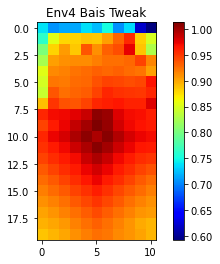

In [29]:
from Net_Qtable import Network_Qtable
import matplotlib.pyplot as plt
img_final = Network_Qtable(model,env)
plt.imshow(img_final, cmap='jet')
plt.title("Env4 Bais Tweak")
plt.colorbar()
plt.show()